In [1]:
import pandas as pd
import us
import numpy as np
from pmdarima import auto_arima
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore") 
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX 


In [2]:
def arima_func(state, st):
    datafram = pd.read_csv('all_state_cases.csv', index_col = 'date', parse_dates= True)
    
#     datafram.head()
    
    model = auto_arima(datafram[state], start_p = 1, start_q = 1, 
                          max_p = 3, max_q = 3, m = 7, 
                          start_P = 0, seasonal = True, 
                          d = None, D = 1, trace = True, 
                          error_action ='ignore',   # we don't want to know if an order does not work 
                          suppress_warnings = True,  # we don't want convergence warnings 
                          stepwise = True)           # set to stepwise 
    
    p, d, q = model.get_params()['order']   #unwarping the order tuple to save the auto selected arima values in to selected variables
    
    P, D, Q, m = model.get_params()['seasonal_order']  #unwarping the seasonal order tuple to save the auto selected seasonal arima values in to selected variables
    
    model = SARIMAX(datafram[state],        
                        order = (p, d, q),  
                        seasonal_order =(P, D, Q, m))  # we used the enite dataset this as training data 
                                                        # we are trying to fit our predicted graph close to the data
    
    result = model.fit()                    #fitting the model based on the entire trainnng data set    
#   result.summary() 
    
    forecast = result.predict(start = len(datafram),  
                              end = (len(datafram)-1) + 30,
                              typ = 'levels').rename('Forecast Cases')   #predicting the future model based on trained data
    
     
    full_state_name = str(us.states.lookup(st))   #look for the full name of the state 
    
    datafram[state].plot(figsize = (12, 5), legend = True, label = "Recorded Cases" ) #plotting the recorded data graph
    forecast.plot(legend = True)        # plotting the forecast plot                                                       
    plt.xlabel('Dates')
    plt.ylabel('COVID-19 Cases')
    plt.title(full_state_name + "'s COVID-19 Cases & Forecast")
    
#     plt.savefig("COVID Graph Models/"+full_state_name +" COVID-19 Model.png", 
#             bbox_inches ="tight", 
#             pad_inches = 1, 
#             transparent = False, 
#             facecolor ="w", 
#             edgecolor ='w', 
#             orientation ='landscape') 
    plt.show()

**We have saved all the data of each individual state's cases in a csv file, and will be parsing through all states to forecast the number of cases expected for the next 30 days for each state using ARIMA modeling**

Performing stepwise search to minimize aic
Fit ARIMA(1,0,1)x(0,1,1,7) [intercept=True]; AIC=1671.656, BIC=1685.635, Time=0.441 seconds
Fit ARIMA(0,0,0)x(0,1,0,7) [intercept=True]; AIC=1735.435, BIC=1741.027, Time=0.010 seconds
Fit ARIMA(1,0,0)x(1,1,0,7) [intercept=True]; AIC=1694.934, BIC=1706.117, Time=0.339 seconds
Fit ARIMA(0,0,1)x(0,1,1,7) [intercept=True]; AIC=1705.810, BIC=1716.993, Time=0.164 seconds
Fit ARIMA(0,0,0)x(0,1,0,7) [intercept=False]; AIC=1744.829, BIC=1747.625, Time=0.010 seconds
Fit ARIMA(1,0,1)x(0,1,0,7) [intercept=True]; AIC=1729.245, BIC=1740.428, Time=0.203 seconds
Fit ARIMA(1,0,1)x(1,1,1,7) [intercept=True]; AIC=1667.266, BIC=1684.041, Time=0.635 seconds
Fit ARIMA(1,0,1)x(1,1,0,7) [intercept=True]; AIC=1678.943, BIC=1692.922, Time=0.508 seconds
Fit ARIMA(1,0,1)x(2,1,1,7) [intercept=True]; AIC=1682.938, BIC=1702.509, Time=1.132 seconds
Near non-invertible roots for order (1, 0, 1)(2, 1, 1, 7); setting score to inf (at least one inverse root too close to the bord

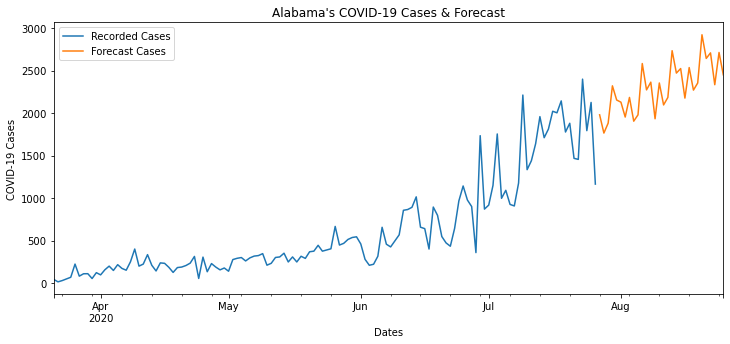

Performing stepwise search to minimize aic
Fit ARIMA(1,1,1)x(0,1,1,7) [intercept=True]; AIC=nan, BIC=nan, Time=nan seconds
Fit ARIMA(0,1,0)x(0,1,0,7) [intercept=True]; AIC=1354.123, BIC=1359.698, Time=0.011 seconds
Fit ARIMA(1,1,0)x(1,1,0,7) [intercept=True]; AIC=1265.049, BIC=1276.199, Time=0.286 seconds
Fit ARIMA(0,1,1)x(0,1,1,7) [intercept=True]; AIC=1223.385, BIC=1234.535, Time=0.262 seconds
Near non-invertible roots for order (0, 1, 1)(0, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.997)
Fit ARIMA(0,1,0)x(0,1,0,7) [intercept=False]; AIC=1352.142, BIC=1354.929, Time=0.012 seconds
Fit ARIMA(1,1,0)x(0,1,0,7) [intercept=True]; AIC=1330.142, BIC=1338.504, Time=0.058 seconds
Fit ARIMA(1,1,0)x(2,1,0,7) [intercept=True]; AIC=1260.036, BIC=1273.973, Time=0.788 seconds
Fit ARIMA(1,1,0)x(2,1,1,7) [intercept=True]; AIC=1261.833, BIC=1278.558, Time=1.254 seconds
Fit ARIMA(1,1,0)x(1,1,1,7) [intercept=True]; AIC=1260.232, BIC=1274.169, T

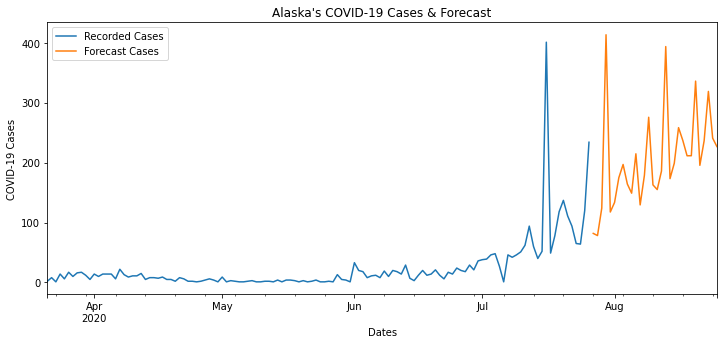

Performing stepwise search to minimize aic
Fit ARIMA(1,0,1)x(0,1,1,7) [intercept=True]; AIC=nan, BIC=nan, Time=nan seconds
Fit ARIMA(0,0,0)x(0,1,0,7) [intercept=True]; AIC=1926.095, BIC=1931.687, Time=0.010 seconds
Fit ARIMA(1,0,0)x(1,1,0,7) [intercept=True]; AIC=1905.008, BIC=1916.192, Time=0.208 seconds
Fit ARIMA(0,0,1)x(0,1,1,7) [intercept=True]; AIC=1911.484, BIC=1922.667, Time=0.340 seconds
Fit ARIMA(0,0,0)x(0,1,0,7) [intercept=False]; AIC=1929.565, BIC=1932.360, Time=0.010 seconds
Fit ARIMA(1,0,0)x(0,1,0,7) [intercept=True]; AIC=1924.553, BIC=1932.941, Time=0.064 seconds
Fit ARIMA(1,0,0)x(2,1,0,7) [intercept=True]; AIC=1906.640, BIC=1920.619, Time=0.434 seconds
Fit ARIMA(1,0,0)x(1,1,1,7) [intercept=True]; AIC=1905.039, BIC=1919.018, Time=0.300 seconds
Fit ARIMA(1,0,0)x(0,1,1,7) [intercept=True]; AIC=1904.231, BIC=1915.414, Time=0.334 seconds
Fit ARIMA(1,0,0)x(0,1,2,7) [intercept=True]; AIC=1905.416, BIC=1919.395, Time=0.679 seconds
Fit ARIMA(1,0,0)x(1,1,2,7) [intercept=True]; AIC

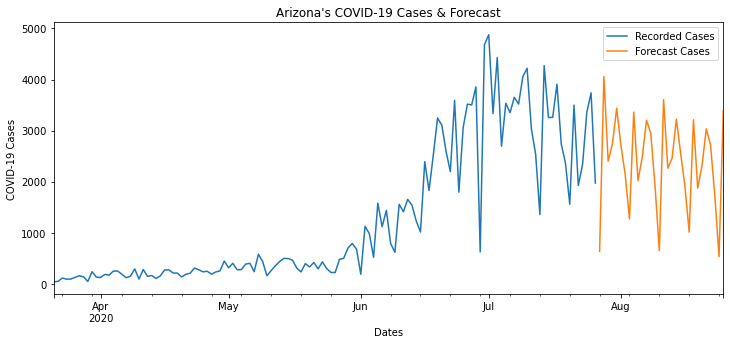

Performing stepwise search to minimize aic
Fit ARIMA(1,0,1)x(0,1,1,7) [intercept=True]; AIC=nan, BIC=nan, Time=nan seconds
Fit ARIMA(0,0,0)x(0,1,0,7) [intercept=True]; AIC=1744.990, BIC=1750.582, Time=0.011 seconds
Fit ARIMA(1,0,0)x(1,1,0,7) [intercept=True]; AIC=1689.700, BIC=1700.883, Time=0.324 seconds
Fit ARIMA(0,0,1)x(0,1,1,7) [intercept=True]; AIC=1689.166, BIC=1700.350, Time=0.327 seconds
Fit ARIMA(0,0,0)x(0,1,0,7) [intercept=False]; AIC=1745.645, BIC=1748.440, Time=0.009 seconds
Fit ARIMA(0,0,1)x(0,1,0,7) [intercept=True]; AIC=1725.571, BIC=1733.958, Time=0.115 seconds
Fit ARIMA(0,0,1)x(1,1,1,7) [intercept=True]; AIC=1689.188, BIC=1703.167, Time=0.406 seconds
Fit ARIMA(0,0,1)x(0,1,2,7) [intercept=True]; AIC=1689.479, BIC=1703.458, Time=0.668 seconds
Fit ARIMA(0,0,1)x(1,1,0,7) [intercept=True]; AIC=1691.015, BIC=1702.198, Time=0.277 seconds
Fit ARIMA(0,0,1)x(1,1,2,7) [intercept=True]; AIC=1688.312, BIC=1705.087, Time=1.436 seconds
Fit ARIMA(0,0,1)x(2,1,2,7) [intercept=True]; AIC

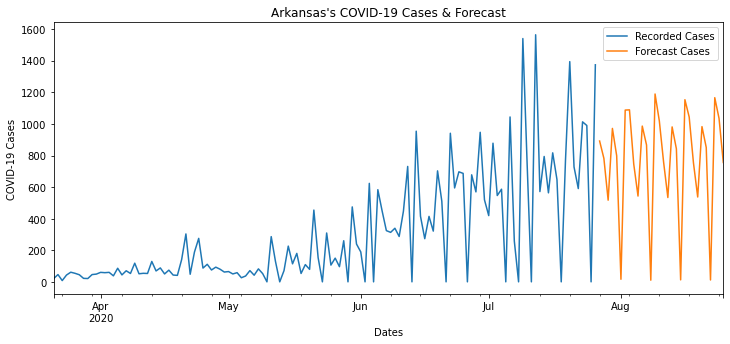

Performing stepwise search to minimize aic
Fit ARIMA(1,1,1)x(0,1,1,7) [intercept=True]; AIC=nan, BIC=nan, Time=nan seconds
Fit ARIMA(0,1,0)x(0,1,0,7) [intercept=True]; AIC=2100.568, BIC=2106.143, Time=0.012 seconds
Fit ARIMA(1,1,0)x(1,1,0,7) [intercept=True]; AIC=2044.279, BIC=2055.429, Time=0.191 seconds
Fit ARIMA(0,1,1)x(0,1,1,7) [intercept=True]; AIC=2000.667, BIC=2011.817, Time=0.360 seconds
Fit ARIMA(0,1,0)x(0,1,0,7) [intercept=False]; AIC=2098.579, BIC=2101.366, Time=0.014 seconds
Fit ARIMA(0,1,1)x(0,1,0,7) [intercept=True]; AIC=2036.389, BIC=2044.752, Time=0.206 seconds
Fit ARIMA(0,1,1)x(1,1,1,7) [intercept=True]; AIC=2002.666, BIC=2016.603, Time=0.521 seconds
Fit ARIMA(0,1,1)x(0,1,2,7) [intercept=True]; AIC=2002.666, BIC=2016.604, Time=0.827 seconds
Fit ARIMA(0,1,1)x(1,1,0,7) [intercept=True]; AIC=2012.818, BIC=2023.968, Time=0.357 seconds
Fit ARIMA(0,1,1)x(1,1,2,7) [intercept=True]; AIC=2004.671, BIC=2021.396, Time=1.648 seconds
Near non-invertible roots for order (0, 1, 1)(1,

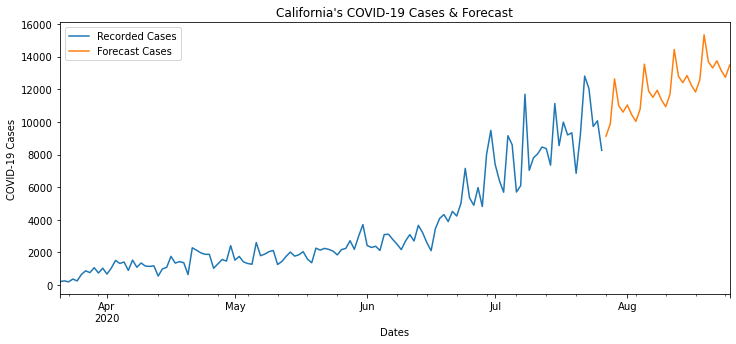

Performing stepwise search to minimize aic
Fit ARIMA(1,0,1)x(0,1,1,7) [intercept=True]; AIC=nan, BIC=nan, Time=nan seconds
Fit ARIMA(0,0,0)x(0,1,0,7) [intercept=True]; AIC=1655.256, BIC=1660.847, Time=0.010 seconds
Fit ARIMA(1,0,0)x(1,1,0,7) [intercept=True]; AIC=1639.131, BIC=1650.315, Time=0.237 seconds
Fit ARIMA(0,0,1)x(0,1,1,7) [intercept=True]; AIC=1630.723, BIC=1641.906, Time=0.268 seconds
Fit ARIMA(0,0,0)x(0,1,0,7) [intercept=False]; AIC=1654.604, BIC=1657.399, Time=0.012 seconds
Fit ARIMA(0,0,1)x(0,1,0,7) [intercept=True]; AIC=1655.400, BIC=1663.787, Time=0.079 seconds
Fit ARIMA(0,0,1)x(1,1,1,7) [intercept=True]; AIC=1627.946, BIC=1641.925, Time=0.454 seconds
Near non-invertible roots for order (0, 0, 1)(1, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA(0,0,1)x(0,1,2,7) [intercept=True]; AIC=1629.638, BIC=1643.617, Time=1.001 seconds
Near non-invertible roots for order (0, 0, 1)(0, 1, 2, 7); setting score t

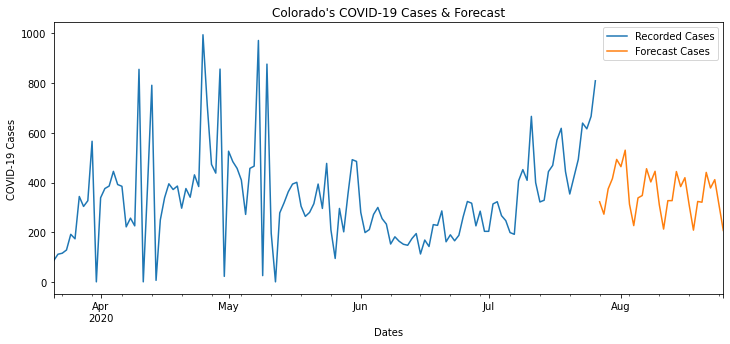

Performing stepwise search to minimize aic
Fit ARIMA(1,0,1)x(0,1,1,7) [intercept=True]; AIC=nan, BIC=nan, Time=nan seconds
Fit ARIMA(0,0,0)x(0,1,0,7) [intercept=True]; AIC=1821.425, BIC=1827.017, Time=0.010 seconds
Fit ARIMA(1,0,0)x(1,1,0,7) [intercept=True]; AIC=1810.531, BIC=1821.714, Time=0.189 seconds
Fit ARIMA(0,0,1)x(0,1,1,7) [intercept=True]; AIC=1802.825, BIC=1814.008, Time=0.328 seconds
Near non-invertible roots for order (0, 0, 1)(0, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.998)
Fit ARIMA(0,0,0)x(0,1,0,7) [intercept=False]; AIC=1819.427, BIC=1822.223, Time=0.011 seconds
Fit ARIMA(1,0,0)x(0,1,0,7) [intercept=True]; AIC=1816.349, BIC=1824.737, Time=0.058 seconds
Fit ARIMA(1,0,0)x(2,1,0,7) [intercept=True]; AIC=1809.063, BIC=1823.042, Time=0.400 seconds
Fit ARIMA(1,0,0)x(2,1,1,7) [intercept=True]; AIC=1796.055, BIC=1812.829, Time=0.985 seconds
Near non-invertible roots for order (1, 0, 0)(2, 1, 1, 7); setting score t

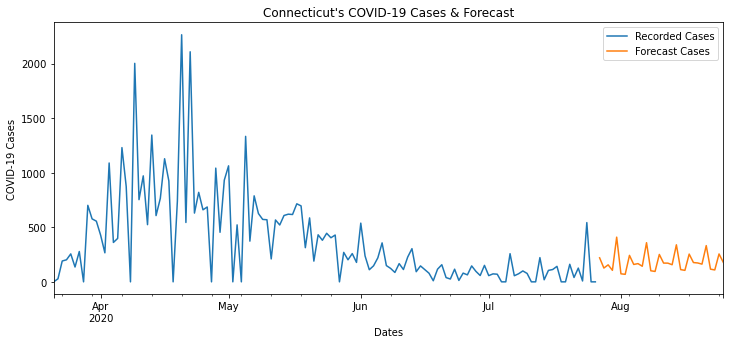

Performing stepwise search to minimize aic
Fit ARIMA(1,0,1)x(0,1,1,7) [intercept=True]; AIC=nan, BIC=nan, Time=nan seconds
Fit ARIMA(0,0,0)x(0,1,0,7) [intercept=True]; AIC=1321.909, BIC=1327.501, Time=0.011 seconds
Fit ARIMA(1,0,0)x(1,1,0,7) [intercept=True]; AIC=1309.577, BIC=1320.760, Time=0.133 seconds
Fit ARIMA(0,0,1)x(0,1,1,7) [intercept=True]; AIC=1309.081, BIC=1320.264, Time=0.189 seconds
Fit ARIMA(0,0,0)x(0,1,0,7) [intercept=False]; AIC=1320.183, BIC=1322.979, Time=0.013 seconds
Fit ARIMA(0,0,1)x(0,1,0,7) [intercept=True]; AIC=1318.347, BIC=1326.735, Time=0.098 seconds
Fit ARIMA(0,0,1)x(1,1,1,7) [intercept=True]; AIC=1302.569, BIC=1316.548, Time=0.552 seconds
Near non-invertible roots for order (0, 0, 1)(1, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA(0,0,1)x(0,1,2,7) [intercept=True]; AIC=1307.926, BIC=1321.905, Time=1.095 seconds
Near non-invertible roots for order (0, 0, 1)(0, 1, 2, 7); setting score t

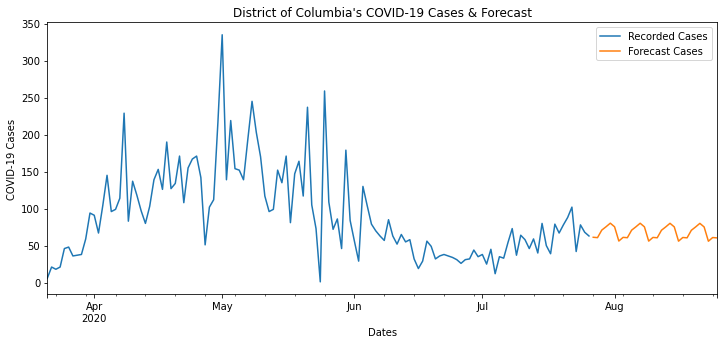

Performing stepwise search to minimize aic
Fit ARIMA(1,0,1)x(0,1,1,7) [intercept=True]; AIC=nan, BIC=nan, Time=nan seconds
Fit ARIMA(0,0,0)x(0,1,0,7) [intercept=True]; AIC=1460.713, BIC=1466.305, Time=0.011 seconds
Fit ARIMA(1,0,0)x(1,1,0,7) [intercept=True]; AIC=1448.083, BIC=1459.267, Time=0.328 seconds
Fit ARIMA(0,0,1)x(0,1,1,7) [intercept=True]; AIC=1443.385, BIC=1454.568, Time=0.281 seconds
Fit ARIMA(0,0,0)x(0,1,0,7) [intercept=False]; AIC=1459.093, BIC=1461.889, Time=0.012 seconds
Fit ARIMA(0,0,1)x(0,1,0,7) [intercept=True]; AIC=1458.407, BIC=1466.794, Time=0.075 seconds
Fit ARIMA(0,0,1)x(1,1,1,7) [intercept=True]; AIC=1437.163, BIC=1451.142, Time=0.391 seconds
Near non-invertible roots for order (0, 0, 1)(1, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.999)
Fit ARIMA(0,0,1)x(0,1,2,7) [intercept=True]; AIC=1439.117, BIC=1453.096, Time=1.008 seconds
Near non-invertible roots for order (0, 0, 1)(0, 1, 2, 7); setting score t

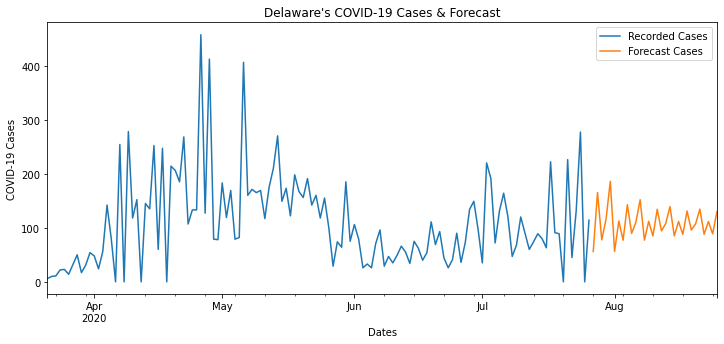

Performing stepwise search to minimize aic
Fit ARIMA(1,1,1)x(0,1,1,7) [intercept=True]; AIC=nan, BIC=nan, Time=nan seconds
Fit ARIMA(0,1,0)x(0,1,0,7) [intercept=True]; AIC=2121.242, BIC=2126.817, Time=0.011 seconds
Fit ARIMA(1,1,0)x(1,1,0,7) [intercept=True]; AIC=2067.601, BIC=2078.751, Time=0.204 seconds
Fit ARIMA(0,1,1)x(0,1,1,7) [intercept=True]; AIC=2038.270, BIC=2049.420, Time=0.338 seconds
Fit ARIMA(0,1,0)x(0,1,0,7) [intercept=False]; AIC=2119.292, BIC=2122.080, Time=0.014 seconds
Fit ARIMA(0,1,1)x(0,1,0,7) [intercept=True]; AIC=2074.624, BIC=2082.987, Time=0.081 seconds
Fit ARIMA(0,1,1)x(1,1,1,7) [intercept=True]; AIC=2039.611, BIC=2053.548, Time=0.687 seconds
Fit ARIMA(0,1,1)x(0,1,2,7) [intercept=True]; AIC=2039.766, BIC=2053.703, Time=0.702 seconds
Fit ARIMA(0,1,1)x(1,1,0,7) [intercept=True]; AIC=2050.588, BIC=2061.738, Time=0.299 seconds
Fit ARIMA(0,1,1)x(1,1,2,7) [intercept=True]; AIC=2041.625, BIC=2058.350, Time=1.220 seconds
Near non-invertible roots for order (0, 1, 1)(1,

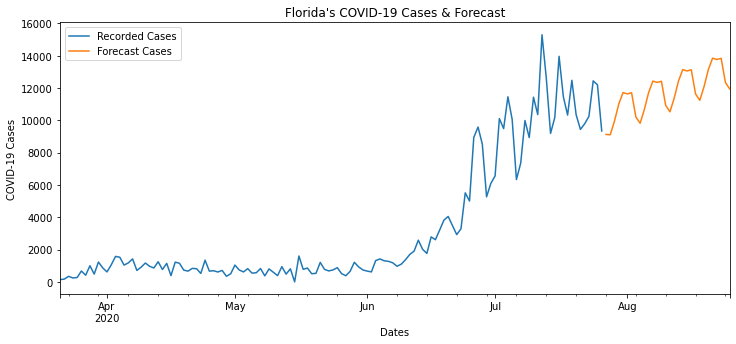

Performing stepwise search to minimize aic
Fit ARIMA(1,1,1)x(0,1,1,7) [intercept=True]; AIC=nan, BIC=nan, Time=nan seconds
Fit ARIMA(0,1,0)x(0,1,0,7) [intercept=True]; AIC=1922.312, BIC=1927.887, Time=0.010 seconds
Fit ARIMA(1,1,0)x(1,1,0,7) [intercept=True]; AIC=1833.442, BIC=1844.592, Time=0.370 seconds
Fit ARIMA(0,1,1)x(0,1,1,7) [intercept=True]; AIC=1797.886, BIC=1809.036, Time=0.357 seconds
Fit ARIMA(0,1,0)x(0,1,0,7) [intercept=False]; AIC=1920.322, BIC=1923.110, Time=0.012 seconds
Fit ARIMA(0,1,1)x(0,1,0,7) [intercept=True]; AIC=1846.984, BIC=1855.346, Time=0.165 seconds
Fit ARIMA(0,1,1)x(1,1,1,7) [intercept=True]; AIC=1793.399, BIC=1807.337, Time=0.686 seconds
Fit ARIMA(0,1,1)x(1,1,0,7) [intercept=True]; AIC=1803.036, BIC=1814.186, Time=0.355 seconds
Fit ARIMA(0,1,1)x(2,1,1,7) [intercept=True]; AIC=1794.619, BIC=1811.344, Time=0.963 seconds
Fit ARIMA(0,1,1)x(1,1,2,7) [intercept=True]; AIC=1795.098, BIC=1811.823, Time=1.174 seconds
Fit ARIMA(0,1,1)x(0,1,2,7) [intercept=True]; AIC

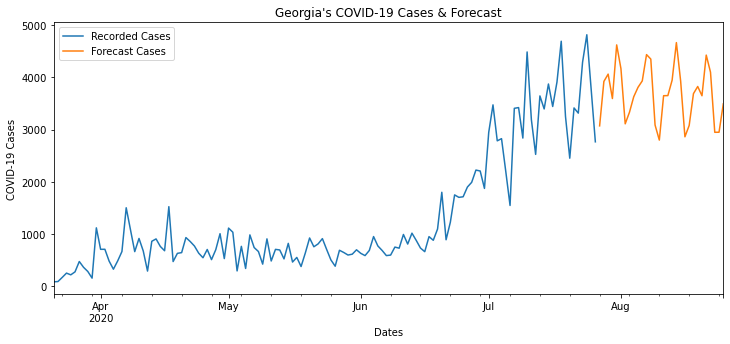

Performing stepwise search to minimize aic
Fit ARIMA(1,0,1)x(0,1,1,7) [intercept=True]; AIC=nan, BIC=nan, Time=nan seconds
Fit ARIMA(0,0,0)x(0,1,0,7) [intercept=True]; AIC=944.131, BIC=949.722, Time=0.009 seconds
Fit ARIMA(1,0,0)x(1,1,0,7) [intercept=True]; AIC=914.811, BIC=925.994, Time=0.144 seconds
Fit ARIMA(0,0,1)x(0,1,1,7) [intercept=True]; AIC=924.644, BIC=935.827, Time=0.187 seconds
Fit ARIMA(0,0,0)x(0,1,0,7) [intercept=False]; AIC=944.176, BIC=946.972, Time=0.011 seconds
Fit ARIMA(1,0,0)x(0,1,0,7) [intercept=True]; AIC=935.059, BIC=943.447, Time=0.039 seconds
Fit ARIMA(1,0,0)x(2,1,0,7) [intercept=True]; AIC=904.983, BIC=918.962, Time=0.292 seconds
Fit ARIMA(1,0,0)x(2,1,1,7) [intercept=True]; AIC=906.974, BIC=923.748, Time=0.488 seconds
Fit ARIMA(1,0,0)x(1,1,1,7) [intercept=True]; AIC=908.471, BIC=922.450, Time=0.174 seconds
Fit ARIMA(0,0,0)x(2,1,0,7) [intercept=True]; AIC=934.091, BIC=945.275, Time=0.158 seconds
Fit ARIMA(2,0,0)x(2,1,0,7) [intercept=True]; AIC=879.974, BIC=896.

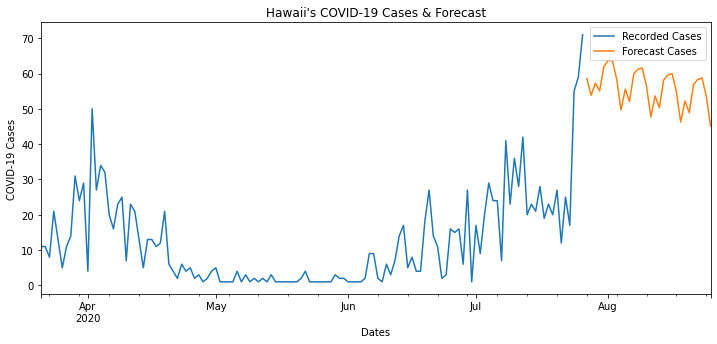

Performing stepwise search to minimize aic
Fit ARIMA(1,1,1)x(0,1,1,7) [intercept=True]; AIC=nan, BIC=nan, Time=nan seconds
Fit ARIMA(0,1,0)x(0,1,0,7) [intercept=True]; AIC=1486.685, BIC=1492.260, Time=0.010 seconds
Fit ARIMA(1,1,0)x(1,1,0,7) [intercept=True]; AIC=1421.066, BIC=1432.216, Time=0.155 seconds
Fit ARIMA(0,1,1)x(0,1,1,7) [intercept=True]; AIC=1369.579, BIC=1380.729, Time=0.324 seconds
Near non-invertible roots for order (0, 1, 1)(0, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.994)
Fit ARIMA(0,1,0)x(0,1,0,7) [intercept=False]; AIC=1484.685, BIC=1487.472, Time=0.010 seconds
Fit ARIMA(1,1,0)x(0,1,0,7) [intercept=True]; AIC=1445.470, BIC=1453.832, Time=0.055 seconds
Fit ARIMA(1,1,0)x(2,1,0,7) [intercept=True]; AIC=1404.183, BIC=1418.121, Time=0.669 seconds
Fit ARIMA(1,1,0)x(2,1,1,7) [intercept=True]; AIC=1394.349, BIC=1411.074, Time=1.136 seconds
Fit ARIMA(1,1,0)x(1,1,1,7) [intercept=True]; AIC=1393.414, BIC=1407.352, T

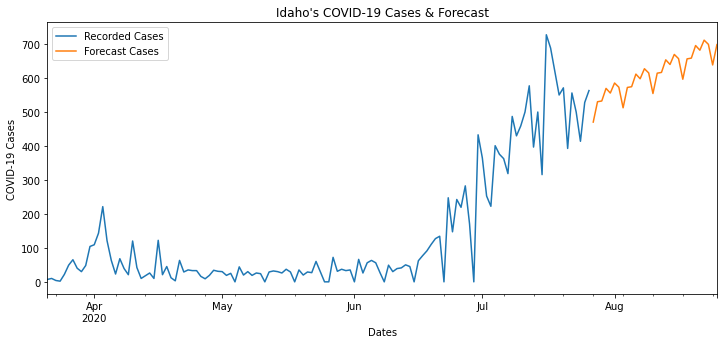

Performing stepwise search to minimize aic
Fit ARIMA(1,1,1)x(0,1,1,7) [intercept=True]; AIC=nan, BIC=nan, Time=nan seconds
Fit ARIMA(0,1,0)x(0,1,0,7) [intercept=True]; AIC=1930.422, BIC=1935.996, Time=0.011 seconds
Fit ARIMA(1,1,0)x(1,1,0,7) [intercept=True]; AIC=1834.159, BIC=1845.309, Time=0.165 seconds
Fit ARIMA(0,1,1)x(0,1,1,7) [intercept=True]; AIC=1793.778, BIC=1804.928, Time=0.402 seconds
Near non-invertible roots for order (0, 1, 1)(0, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA(0,1,0)x(0,1,0,7) [intercept=False]; AIC=1928.424, BIC=1931.211, Time=0.011 seconds
Fit ARIMA(1,1,0)x(0,1,0,7) [intercept=True]; AIC=1872.069, BIC=1880.432, Time=0.024 seconds
Fit ARIMA(1,1,0)x(2,1,0,7) [intercept=True]; AIC=1801.533, BIC=1815.471, Time=0.475 seconds
Fit ARIMA(1,1,0)x(2,1,1,7) [intercept=True]; AIC=1799.817, BIC=1816.542, Time=1.140 seconds
Near non-invertible roots for order (1, 1, 0)(2, 1, 1, 7); setting score t

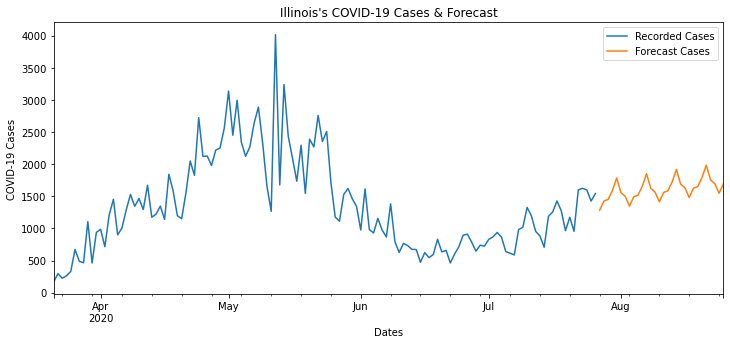

Performing stepwise search to minimize aic
Fit ARIMA(1,0,1)x(0,1,1,7) [intercept=True]; AIC=nan, BIC=nan, Time=nan seconds
Fit ARIMA(0,0,0)x(0,1,0,7) [intercept=True]; AIC=1574.727, BIC=1580.319, Time=0.010 seconds
Fit ARIMA(1,0,0)x(1,1,0,7) [intercept=True]; AIC=1529.984, BIC=1541.167, Time=0.366 seconds
Fit ARIMA(0,0,1)x(0,1,1,7) [intercept=True]; AIC=1548.721, BIC=1559.905, Time=0.261 seconds
Fit ARIMA(0,0,0)x(0,1,0,7) [intercept=False]; AIC=1580.289, BIC=1583.084, Time=0.010 seconds
Fit ARIMA(1,0,0)x(0,1,0,7) [intercept=True]; AIC=1555.829, BIC=1564.217, Time=0.056 seconds
Fit ARIMA(1,0,0)x(2,1,0,7) [intercept=True]; AIC=1525.121, BIC=1539.100, Time=0.405 seconds
Fit ARIMA(1,0,0)x(2,1,1,7) [intercept=True]; AIC=1515.907, BIC=1532.682, Time=0.845 seconds
Near non-invertible roots for order (1, 0, 0)(2, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.999)
Fit ARIMA(1,0,0)x(1,1,1,7) [intercept=True]; AIC=1515.457, BIC=1529.436, T

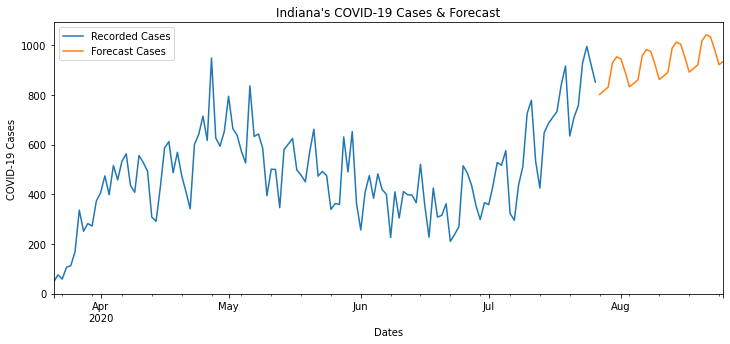

Performing stepwise search to minimize aic
Fit ARIMA(1,0,1)x(0,1,1,7) [intercept=True]; AIC=nan, BIC=nan, Time=nan seconds
Fit ARIMA(0,0,0)x(0,1,0,7) [intercept=True]; AIC=1617.436, BIC=1623.028, Time=0.011 seconds
Fit ARIMA(1,0,0)x(1,1,0,7) [intercept=True]; AIC=1601.760, BIC=1612.943, Time=0.299 seconds
Fit ARIMA(0,0,1)x(0,1,1,7) [intercept=True]; AIC=1593.414, BIC=1604.598, Time=0.295 seconds
Fit ARIMA(0,0,0)x(0,1,0,7) [intercept=False]; AIC=1617.880, BIC=1620.675, Time=0.011 seconds
Fit ARIMA(0,0,1)x(0,1,0,7) [intercept=True]; AIC=1616.548, BIC=1624.935, Time=0.097 seconds
Fit ARIMA(0,0,1)x(1,1,1,7) [intercept=True]; AIC=1592.219, BIC=1606.198, Time=0.388 seconds
Fit ARIMA(0,0,1)x(1,1,0,7) [intercept=True]; AIC=1601.761, BIC=1612.944, Time=0.281 seconds
Fit ARIMA(0,0,1)x(2,1,1,7) [intercept=True]; AIC=1592.419, BIC=1609.194, Time=0.697 seconds
Near non-invertible roots for order (0, 0, 1)(2, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the un

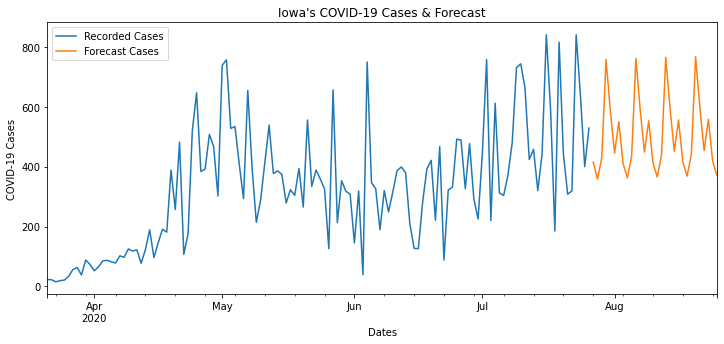

Performing stepwise search to minimize aic
Fit ARIMA(1,0,1)x(0,1,1,7) [intercept=True]; AIC=nan, BIC=nan, Time=nan seconds
Fit ARIMA(0,0,0)x(0,1,0,7) [intercept=True]; AIC=1493.254, BIC=1498.846, Time=0.009 seconds
Fit ARIMA(1,0,0)x(1,1,0,7) [intercept=True]; AIC=1496.225, BIC=1507.409, Time=0.238 seconds
Fit ARIMA(0,0,1)x(0,1,1,7) [intercept=True]; AIC=1496.455, BIC=1507.638, Time=0.166 seconds
Fit ARIMA(0,0,0)x(0,1,0,7) [intercept=False]; AIC=1496.823, BIC=1499.619, Time=0.011 seconds
Fit ARIMA(0,0,0)x(1,1,0,7) [intercept=True]; AIC=1494.351, BIC=1502.739, Time=0.262 seconds
Fit ARIMA(0,0,0)x(0,1,1,7) [intercept=True]; AIC=1494.540, BIC=1502.927, Time=0.047 seconds
Fit ARIMA(0,0,0)x(1,1,1,7) [intercept=True]; AIC=1495.985, BIC=1507.168, Time=0.254 seconds
Fit ARIMA(1,0,0)x(0,1,0,7) [intercept=True]; AIC=1495.131, BIC=1503.519, Time=0.022 seconds
Fit ARIMA(0,0,1)x(0,1,0,7) [intercept=True]; AIC=1495.171, BIC=1503.558, Time=0.072 seconds
Fit ARIMA(1,0,1)x(0,1,0,7) [intercept=True]; AIC

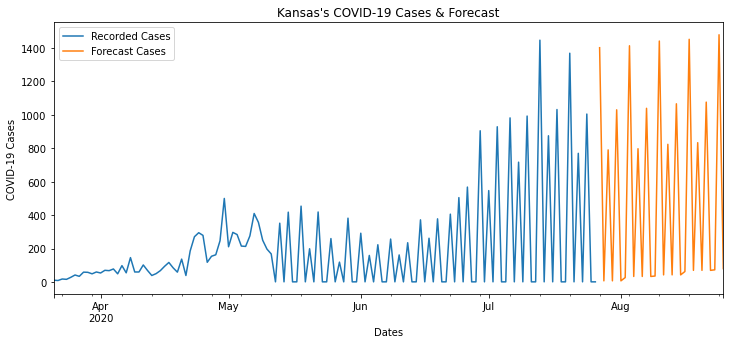

Performing stepwise search to minimize aic
Fit ARIMA(1,0,1)x(0,1,1,7) [intercept=True]; AIC=nan, BIC=nan, Time=nan seconds
Fit ARIMA(0,0,0)x(0,1,0,7) [intercept=True]; AIC=1618.892, BIC=1624.484, Time=0.010 seconds
Fit ARIMA(1,0,0)x(1,1,0,7) [intercept=True]; AIC=1604.149, BIC=1615.332, Time=0.238 seconds
Fit ARIMA(0,0,1)x(0,1,1,7) [intercept=True]; AIC=1587.646, BIC=1598.830, Time=0.394 seconds
Near non-invertible roots for order (0, 0, 1)(0, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.999)
Fit ARIMA(0,0,0)x(0,1,0,7) [intercept=False]; AIC=1619.971, BIC=1622.767, Time=0.010 seconds
Fit ARIMA(1,0,0)x(0,1,0,7) [intercept=True]; AIC=1617.231, BIC=1625.619, Time=0.069 seconds
Fit ARIMA(1,0,0)x(2,1,0,7) [intercept=True]; AIC=1593.303, BIC=1607.282, Time=0.563 seconds
Fit ARIMA(1,0,0)x(2,1,1,7) [intercept=True]; AIC=1586.069, BIC=1602.844, Time=1.038 seconds
Near non-invertible roots for order (1, 0, 0)(2, 1, 1, 7); setting score t

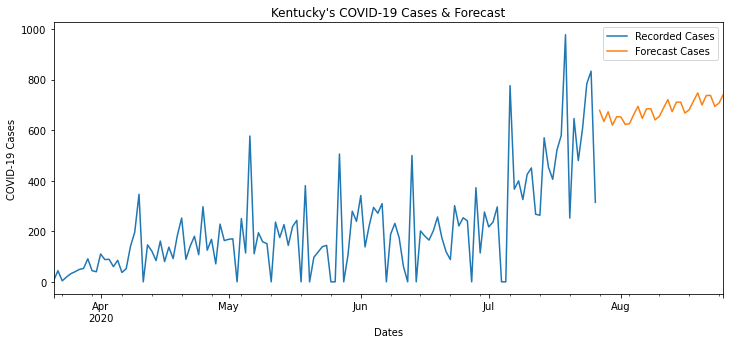

Performing stepwise search to minimize aic
Fit ARIMA(1,0,1)x(0,1,1,7) [intercept=True]; AIC=nan, BIC=nan, Time=nan seconds
Fit ARIMA(0,0,0)x(0,1,0,7) [intercept=True]; AIC=1913.670, BIC=1919.261, Time=0.048 seconds
Fit ARIMA(1,0,0)x(1,1,0,7) [intercept=True]; AIC=1906.149, BIC=1917.333, Time=0.900 seconds
Fit ARIMA(0,0,1)x(0,1,1,7) [intercept=True]; AIC=1904.440, BIC=1915.623, Time=0.342 seconds
Fit ARIMA(0,0,0)x(0,1,0,7) [intercept=False]; AIC=1915.266, BIC=1918.062, Time=0.011 seconds
Fit ARIMA(0,0,1)x(0,1,0,7) [intercept=True]; AIC=1913.780, BIC=1922.167, Time=0.032 seconds
Fit ARIMA(0,0,1)x(1,1,1,7) [intercept=True]; AIC=1906.162, BIC=1920.141, Time=0.330 seconds
Fit ARIMA(0,0,1)x(0,1,2,7) [intercept=True]; AIC=1905.772, BIC=1919.750, Time=1.088 seconds
Fit ARIMA(0,0,1)x(1,1,0,7) [intercept=True]; AIC=1907.700, BIC=1918.883, Time=0.374 seconds
Fit ARIMA(0,0,1)x(1,1,2,7) [intercept=True]; AIC=1906.311, BIC=1923.086, Time=0.835 seconds
Fit ARIMA(0,0,0)x(0,1,1,7) [intercept=True]; AIC

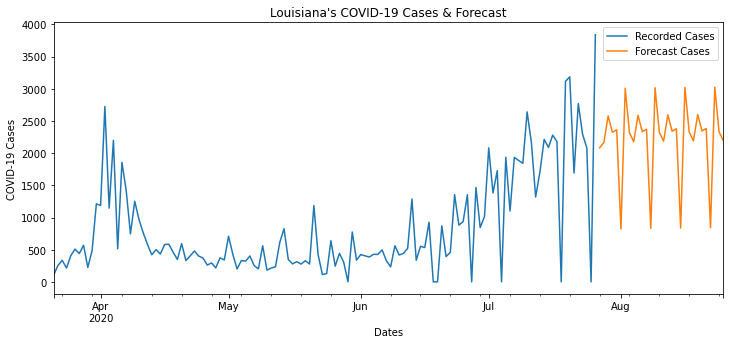

Performing stepwise search to minimize aic
Fit ARIMA(1,0,1)x(0,1,1,7) [intercept=True]; AIC=nan, BIC=nan, Time=nan seconds
Fit ARIMA(0,0,0)x(0,1,0,7) [intercept=True]; AIC=1035.044, BIC=1040.636, Time=0.009 seconds
Fit ARIMA(1,0,0)x(1,1,0,7) [intercept=True]; AIC=1003.848, BIC=1015.032, Time=0.154 seconds
Fit ARIMA(0,0,1)x(0,1,1,7) [intercept=True]; AIC=992.438, BIC=1003.621, Time=0.168 seconds
Fit ARIMA(0,0,0)x(0,1,0,7) [intercept=False]; AIC=1033.052, BIC=1035.848, Time=0.009 seconds
Fit ARIMA(0,0,1)x(0,1,0,7) [intercept=True]; AIC=1031.817, BIC=1040.205, Time=0.080 seconds
Fit ARIMA(0,0,1)x(1,1,1,7) [intercept=True]; AIC=991.988, BIC=1005.967, Time=0.458 seconds
Near non-invertible roots for order (0, 0, 1)(1, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA(0,0,1)x(0,1,2,7) [intercept=True]; AIC=992.588, BIC=1006.567, Time=0.856 seconds
Near non-invertible roots for order (0, 0, 1)(0, 1, 2, 7); setting score to i

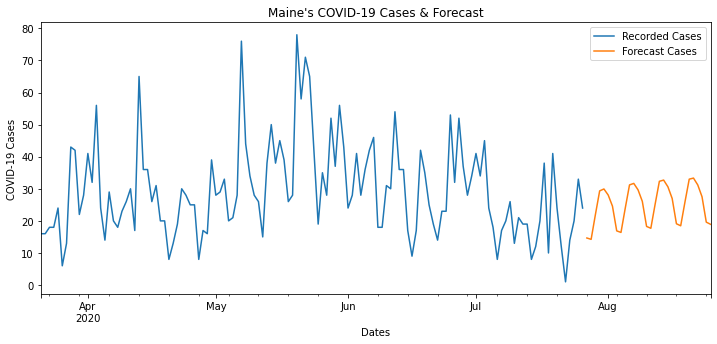

Performing stepwise search to minimize aic
Fit ARIMA(1,1,1)x(0,1,1,7) [intercept=True]; AIC=nan, BIC=nan, Time=nan seconds
Fit ARIMA(0,1,0)x(0,1,0,7) [intercept=True]; AIC=1750.413, BIC=1755.988, Time=0.010 seconds
Fit ARIMA(1,1,0)x(1,1,0,7) [intercept=True]; AIC=1687.162, BIC=1698.312, Time=0.157 seconds
Fit ARIMA(0,1,1)x(0,1,1,7) [intercept=True]; AIC=1642.693, BIC=1653.843, Time=0.340 seconds
Fit ARIMA(0,1,0)x(0,1,0,7) [intercept=False]; AIC=1748.425, BIC=1751.212, Time=0.012 seconds
Fit ARIMA(0,1,1)x(0,1,0,7) [intercept=True]; AIC=1688.020, BIC=1696.382, Time=0.084 seconds
Fit ARIMA(0,1,1)x(1,1,1,7) [intercept=True]; AIC=1643.895, BIC=1657.832, Time=0.690 seconds
Near non-invertible roots for order (0, 1, 1)(1, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA(0,1,1)x(0,1,2,7) [intercept=True]; AIC=1644.102, BIC=1658.040, Time=0.722 seconds
Near non-invertible roots for order (0, 1, 1)(0, 1, 2, 7); setting score t

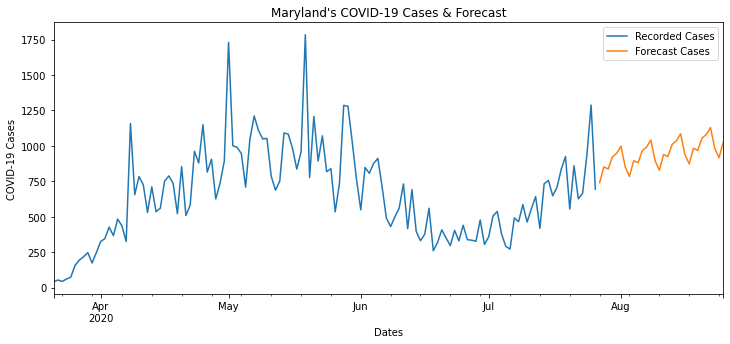

Performing stepwise search to minimize aic
Fit ARIMA(1,1,1)x(0,1,1,7) [intercept=True]; AIC=nan, BIC=nan, Time=nan seconds
Fit ARIMA(0,1,0)x(0,1,0,7) [intercept=True]; AIC=1924.647, BIC=1930.222, Time=0.010 seconds
Fit ARIMA(1,1,0)x(1,1,0,7) [intercept=True]; AIC=1870.970, BIC=1882.120, Time=0.156 seconds
Fit ARIMA(0,1,1)x(0,1,1,7) [intercept=True]; AIC=1826.778, BIC=1837.928, Time=0.375 seconds
Fit ARIMA(0,1,0)x(0,1,0,7) [intercept=False]; AIC=1922.659, BIC=1925.446, Time=0.011 seconds
Fit ARIMA(0,1,1)x(0,1,0,7) [intercept=True]; AIC=1866.742, BIC=1875.104, Time=0.095 seconds
Fit ARIMA(0,1,1)x(1,1,1,7) [intercept=True]; AIC=1826.523, BIC=1840.460, Time=0.603 seconds
Near non-invertible roots for order (0, 1, 1)(1, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.996)
Fit ARIMA(0,1,1)x(0,1,2,7) [intercept=True]; AIC=1827.211, BIC=1841.149, Time=0.773 seconds
Fit ARIMA(0,1,1)x(1,1,0,7) [intercept=True]; AIC=1842.171, BIC=1853.321, T

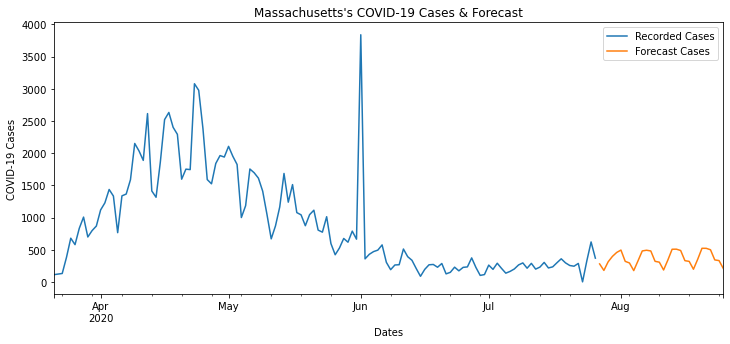

Performing stepwise search to minimize aic
Fit ARIMA(1,0,1)x(0,1,1,7) [intercept=True]; AIC=nan, BIC=nan, Time=nan seconds
Fit ARIMA(0,0,0)x(0,1,0,7) [intercept=True]; AIC=1679.130, BIC=1684.722, Time=0.009 seconds
Fit ARIMA(1,0,0)x(1,1,0,7) [intercept=True]; AIC=1663.944, BIC=1675.127, Time=0.175 seconds
Fit ARIMA(0,0,1)x(0,1,1,7) [intercept=True]; AIC=1668.143, BIC=1679.326, Time=0.248 seconds
Fit ARIMA(0,0,0)x(0,1,0,7) [intercept=False]; AIC=1678.190, BIC=1680.986, Time=0.010 seconds
Fit ARIMA(1,0,0)x(0,1,0,7) [intercept=True]; AIC=1665.602, BIC=1673.990, Time=0.023 seconds
Fit ARIMA(1,0,0)x(2,1,0,7) [intercept=True]; AIC=1660.888, BIC=1674.867, Time=0.354 seconds
Fit ARIMA(1,0,0)x(2,1,1,7) [intercept=True]; AIC=1662.117, BIC=1678.892, Time=0.580 seconds
Fit ARIMA(1,0,0)x(1,1,1,7) [intercept=True]; AIC=1663.127, BIC=1677.106, Time=0.444 seconds
Near non-invertible roots for order (1, 0, 0)(1, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the un

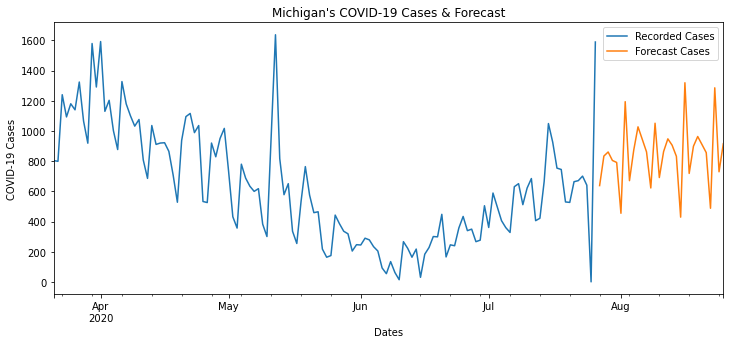

Performing stepwise search to minimize aic
Fit ARIMA(1,0,1)x(0,1,1,7) [intercept=True]; AIC=nan, BIC=nan, Time=nan seconds
Fit ARIMA(0,0,0)x(0,1,0,7) [intercept=True]; AIC=1613.791, BIC=1619.383, Time=0.010 seconds
Fit ARIMA(1,0,0)x(1,1,0,7) [intercept=True]; AIC=1564.460, BIC=1575.643, Time=0.187 seconds
Fit ARIMA(0,0,1)x(0,1,1,7) [intercept=True]; AIC=1583.180, BIC=1594.363, Time=0.313 seconds
Fit ARIMA(0,0,0)x(0,1,0,7) [intercept=False]; AIC=1616.697, BIC=1619.493, Time=0.011 seconds
Fit ARIMA(1,0,0)x(0,1,0,7) [intercept=True]; AIC=1580.743, BIC=1589.130, Time=0.024 seconds
Fit ARIMA(1,0,0)x(2,1,0,7) [intercept=True]; AIC=1566.452, BIC=1580.431, Time=0.408 seconds
Fit ARIMA(1,0,0)x(1,1,1,7) [intercept=True]; AIC=1566.448, BIC=1580.427, Time=0.265 seconds
Fit ARIMA(1,0,0)x(0,1,1,7) [intercept=True]; AIC=1565.859, BIC=1577.042, Time=0.262 seconds
Fit ARIMA(1,0,0)x(2,1,1,7) [intercept=True]; AIC=1567.497, BIC=1584.272, Time=0.982 seconds
Near non-invertible roots for order (1, 0, 0)(2,

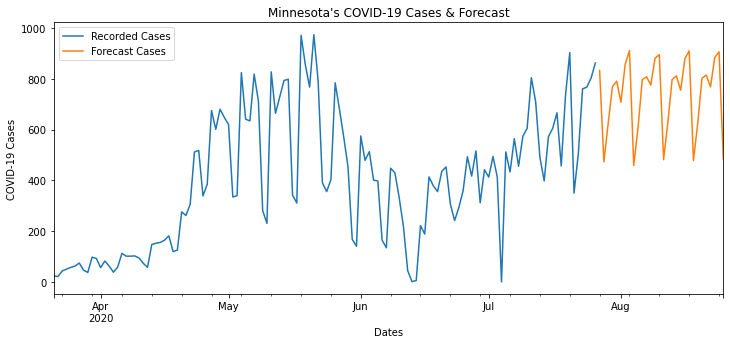

Performing stepwise search to minimize aic
Fit ARIMA(1,1,1)x(0,1,1,7) [intercept=True]; AIC=nan, BIC=nan, Time=nan seconds
Fit ARIMA(0,1,0)x(0,1,0,7) [intercept=True]; AIC=1842.886, BIC=1848.461, Time=0.011 seconds
Fit ARIMA(1,1,0)x(1,1,0,7) [intercept=True]; AIC=1775.582, BIC=1786.732, Time=0.160 seconds
Fit ARIMA(0,1,1)x(0,1,1,7) [intercept=True]; AIC=1699.831, BIC=1710.981, Time=0.453 seconds
Near non-invertible roots for order (0, 1, 1)(0, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.999)
Fit ARIMA(0,1,0)x(0,1,0,7) [intercept=False]; AIC=1840.891, BIC=1843.679, Time=0.010 seconds
Fit ARIMA(1,1,0)x(0,1,0,7) [intercept=True]; AIC=1798.730, BIC=1807.092, Time=0.026 seconds
Fit ARIMA(1,1,0)x(2,1,0,7) [intercept=True]; AIC=1764.162, BIC=1778.099, Time=0.468 seconds
Fit ARIMA(1,1,0)x(2,1,1,7) [intercept=True]; AIC=1742.804, BIC=1759.529, Time=1.079 seconds
Near non-invertible roots for order (1, 1, 0)(2, 1, 1, 7); setting score t

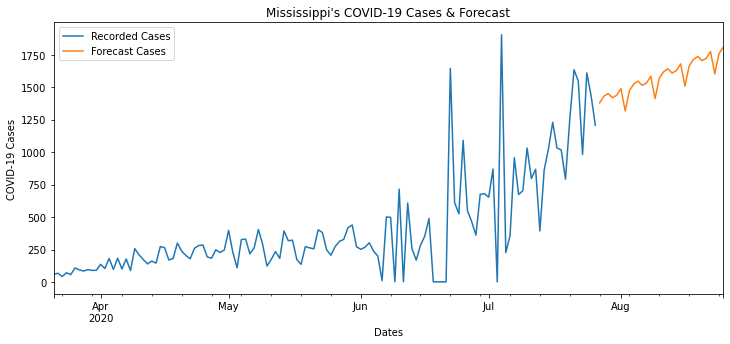

Performing stepwise search to minimize aic
Fit ARIMA(1,1,1)x(0,1,1,7) [intercept=True]; AIC=nan, BIC=nan, Time=nan seconds
Fit ARIMA(0,1,0)x(0,1,0,7) [intercept=True]; AIC=1703.073, BIC=1708.648, Time=0.010 seconds
Fit ARIMA(1,1,0)x(1,1,0,7) [intercept=True]; AIC=1633.188, BIC=1644.338, Time=0.147 seconds
Fit ARIMA(0,1,1)x(0,1,1,7) [intercept=True]; AIC=1584.969, BIC=1596.119, Time=0.316 seconds
Fit ARIMA(0,1,0)x(0,1,0,7) [intercept=False]; AIC=1701.078, BIC=1703.865, Time=0.010 seconds
Fit ARIMA(0,1,1)x(0,1,0,7) [intercept=True]; AIC=1619.966, BIC=1628.328, Time=0.086 seconds
Fit ARIMA(0,1,1)x(1,1,1,7) [intercept=True]; AIC=1586.902, BIC=1600.839, Time=0.492 seconds
Fit ARIMA(0,1,1)x(0,1,2,7) [intercept=True]; AIC=1586.872, BIC=1600.810, Time=0.591 seconds
Fit ARIMA(0,1,1)x(1,1,0,7) [intercept=True]; AIC=1604.457, BIC=1615.607, Time=0.248 seconds
Fit ARIMA(0,1,1)x(1,1,2,7) [intercept=True]; AIC=1588.899, BIC=1605.624, Time=0.913 seconds
Near non-invertible roots for order (0, 1, 1)(1,

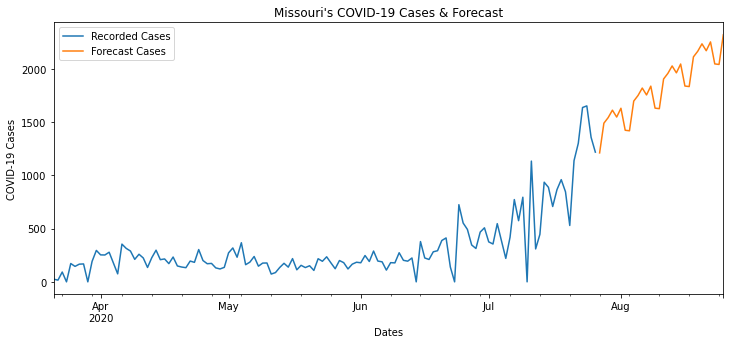

Performing stepwise search to minimize aic
Fit ARIMA(1,1,1)x(0,1,1,7) [intercept=True]; AIC=nan, BIC=nan, Time=nan seconds
Fit ARIMA(0,1,0)x(0,1,0,7) [intercept=True]; AIC=1089.090, BIC=1094.665, Time=0.011 seconds
Fit ARIMA(1,1,0)x(1,1,0,7) [intercept=True]; AIC=1057.001, BIC=1068.151, Time=0.141 seconds
Fit ARIMA(0,1,1)x(0,1,1,7) [intercept=True]; AIC=1035.826, BIC=1046.976, Time=0.128 seconds
Fit ARIMA(0,1,0)x(0,1,0,7) [intercept=False]; AIC=1087.090, BIC=1089.878, Time=0.010 seconds
Fit ARIMA(0,1,1)x(0,1,0,7) [intercept=True]; AIC=1059.058, BIC=1067.421, Time=0.046 seconds
Fit ARIMA(0,1,1)x(1,1,1,7) [intercept=True]; AIC=1037.821, BIC=1051.759, Time=0.236 seconds
Fit ARIMA(0,1,1)x(0,1,2,7) [intercept=True]; AIC=1037.822, BIC=1051.760, Time=0.304 seconds
Fit ARIMA(0,1,1)x(1,1,0,7) [intercept=True]; AIC=1041.274, BIC=1052.423, Time=0.115 seconds
Fit ARIMA(0,1,1)x(1,1,2,7) [intercept=True]; AIC=1039.222, BIC=1055.947, Time=0.681 seconds
Fit ARIMA(0,1,0)x(0,1,1,7) [intercept=True]; AIC

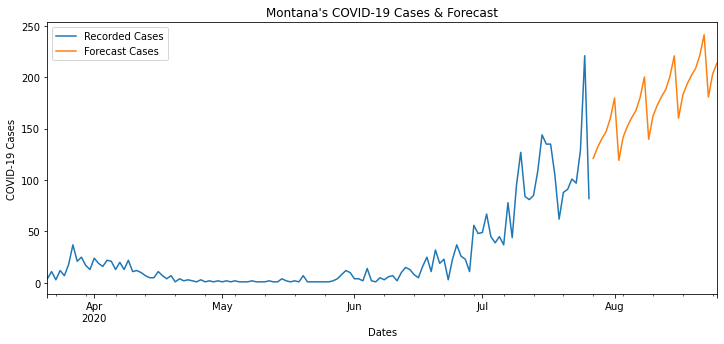

Performing stepwise search to minimize aic
Fit ARIMA(1,0,1)x(0,1,1,7) [intercept=True]; AIC=nan, BIC=nan, Time=nan seconds
Fit ARIMA(0,0,0)x(0,1,0,7) [intercept=True]; AIC=1486.616, BIC=1492.208, Time=0.009 seconds
Fit ARIMA(1,0,0)x(1,1,0,7) [intercept=True]; AIC=1472.572, BIC=1483.755, Time=0.148 seconds
Fit ARIMA(0,0,1)x(0,1,1,7) [intercept=True]; AIC=1479.203, BIC=1490.386, Time=0.180 seconds
Fit ARIMA(0,0,0)x(0,1,0,7) [intercept=False]; AIC=1486.926, BIC=1489.722, Time=0.010 seconds
Fit ARIMA(1,0,0)x(0,1,0,7) [intercept=True]; AIC=1483.386, BIC=1491.773, Time=0.054 seconds
Fit ARIMA(1,0,0)x(2,1,0,7) [intercept=True]; AIC=1472.612, BIC=1486.591, Time=0.341 seconds
Fit ARIMA(1,0,0)x(1,1,1,7) [intercept=True]; AIC=1462.945, BIC=1476.924, Time=0.553 seconds
Near non-invertible roots for order (1, 0, 0)(1, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA(1,0,0)x(0,1,1,7) [intercept=True]; AIC=1465.506, BIC=1476.689, T

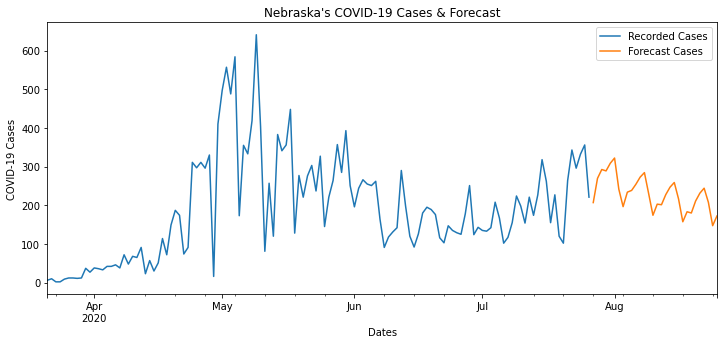

Performing stepwise search to minimize aic
Fit ARIMA(1,0,1)x(0,1,1,7) [intercept=True]; AIC=nan, BIC=nan, Time=nan seconds
Fit ARIMA(0,0,0)x(0,1,0,7) [intercept=True]; AIC=1599.345, BIC=1604.936, Time=0.009 seconds
Fit ARIMA(1,0,0)x(1,1,0,7) [intercept=True]; AIC=1572.155, BIC=1583.339, Time=0.294 seconds
Fit ARIMA(0,0,1)x(0,1,1,7) [intercept=True]; AIC=1581.818, BIC=1593.001, Time=0.287 seconds
Fit ARIMA(0,0,0)x(0,1,0,7) [intercept=False]; AIC=1608.547, BIC=1611.343, Time=0.010 seconds
Fit ARIMA(1,0,0)x(0,1,0,7) [intercept=True]; AIC=1585.711, BIC=1594.098, Time=0.051 seconds
Fit ARIMA(1,0,0)x(2,1,0,7) [intercept=True]; AIC=1565.444, BIC=1579.423, Time=0.671 seconds
Fit ARIMA(1,0,0)x(2,1,1,7) [intercept=True]; AIC=1566.255, BIC=1583.030, Time=0.713 seconds
Fit ARIMA(1,0,0)x(1,1,1,7) [intercept=True]; AIC=1566.438, BIC=1580.417, Time=0.444 seconds
Fit ARIMA(0,0,0)x(2,1,0,7) [intercept=True]; AIC=1594.203, BIC=1605.387, Time=0.494 seconds
Fit ARIMA(2,0,0)x(2,1,0,7) [intercept=True]; AIC

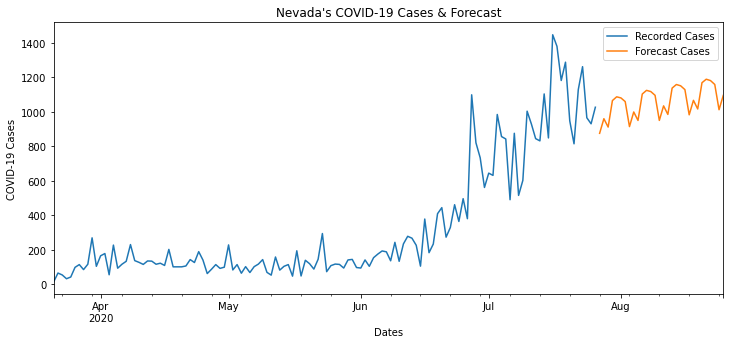

Performing stepwise search to minimize aic
Fit ARIMA(1,0,1)x(0,1,1,7) [intercept=True]; AIC=nan, BIC=nan, Time=nan seconds
Fit ARIMA(0,0,0)x(0,1,0,7) [intercept=True]; AIC=1291.444, BIC=1297.036, Time=0.010 seconds
Fit ARIMA(1,0,0)x(1,1,0,7) [intercept=True]; AIC=1256.796, BIC=1267.979, Time=0.188 seconds
Fit ARIMA(0,0,1)x(0,1,1,7) [intercept=True]; AIC=1253.807, BIC=1264.990, Time=0.220 seconds
Fit ARIMA(0,0,0)x(0,1,0,7) [intercept=False]; AIC=1289.493, BIC=1292.289, Time=0.010 seconds
Fit ARIMA(0,0,1)x(0,1,0,7) [intercept=True]; AIC=1277.721, BIC=1286.108, Time=0.058 seconds
Fit ARIMA(0,0,1)x(1,1,1,7) [intercept=True]; AIC=1254.294, BIC=1268.273, Time=0.566 seconds
Near non-invertible roots for order (0, 0, 1)(1, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA(0,0,1)x(0,1,2,7) [intercept=True]; AIC=1255.807, BIC=1269.786, Time=0.467 seconds
Fit ARIMA(0,0,1)x(1,1,0,7) [intercept=True]; AIC=1260.134, BIC=1271.318, T

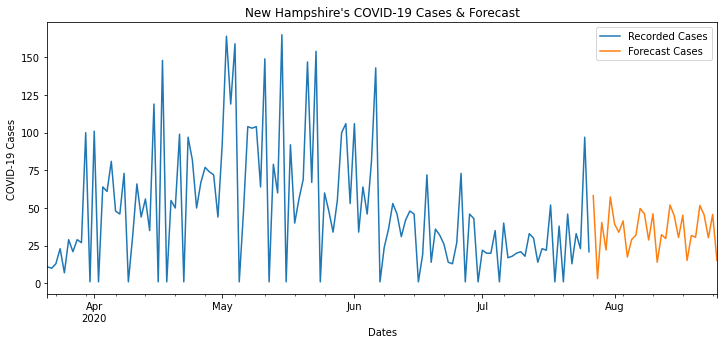

Performing stepwise search to minimize aic
Fit ARIMA(1,0,1)x(0,1,1,7) [intercept=True]; AIC=nan, BIC=nan, Time=nan seconds
Fit ARIMA(0,0,0)x(0,1,0,7) [intercept=True]; AIC=1943.653, BIC=1949.244, Time=0.010 seconds
Fit ARIMA(1,0,0)x(1,1,0,7) [intercept=True]; AIC=1907.226, BIC=1918.410, Time=0.271 seconds
Fit ARIMA(0,0,1)x(0,1,1,7) [intercept=True]; AIC=1928.371, BIC=1939.554, Time=0.359 seconds
Fit ARIMA(0,0,0)x(0,1,0,7) [intercept=False]; AIC=1942.094, BIC=1944.890, Time=0.009 seconds
Fit ARIMA(1,0,0)x(0,1,0,7) [intercept=True]; AIC=1906.774, BIC=1915.161, Time=0.072 seconds
Fit ARIMA(1,0,0)x(0,1,1,7) [intercept=True]; AIC=1892.261, BIC=1903.444, Time=0.412 seconds
Fit ARIMA(1,0,0)x(1,1,1,7) [intercept=True]; AIC=1885.335, BIC=1899.314, Time=0.577 seconds
Near non-invertible roots for order (1, 0, 0)(1, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA(1,0,0)x(0,1,2,7) [intercept=True]; AIC=1875.792, BIC=1889.771, T

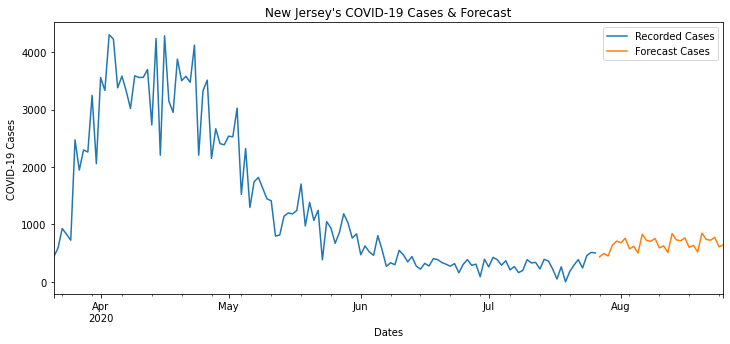

Performing stepwise search to minimize aic
Fit ARIMA(1,0,1)x(0,1,1,7) [intercept=True]; AIC=nan, BIC=nan, Time=nan seconds
Fit ARIMA(0,0,0)x(0,1,0,7) [intercept=True]; AIC=1384.584, BIC=1390.175, Time=0.010 seconds
Fit ARIMA(1,0,0)x(1,1,0,7) [intercept=True]; AIC=1361.945, BIC=1373.128, Time=0.264 seconds
Fit ARIMA(0,0,1)x(0,1,1,7) [intercept=True]; AIC=1341.026, BIC=1352.210, Time=0.329 seconds
Near non-invertible roots for order (0, 0, 1)(0, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA(0,0,0)x(0,1,0,7) [intercept=False]; AIC=1388.439, BIC=1391.235, Time=0.011 seconds
Fit ARIMA(1,0,0)x(0,1,0,7) [intercept=True]; AIC=1386.012, BIC=1394.399, Time=0.053 seconds
Fit ARIMA(1,0,0)x(2,1,0,7) [intercept=True]; AIC=1352.833, BIC=1366.812, Time=0.532 seconds
Fit ARIMA(1,0,0)x(2,1,1,7) [intercept=True]; AIC=1342.247, BIC=1359.022, Time=0.778 seconds
Near non-invertible roots for order (1, 0, 0)(2, 1, 1, 7); setting score t

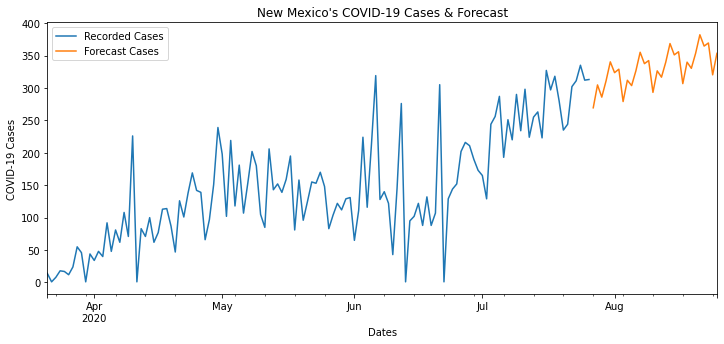

Performing stepwise search to minimize aic
Fit ARIMA(1,0,1)x(0,1,1,7) [intercept=True]; AIC=nan, BIC=nan, Time=nan seconds
Fit ARIMA(0,0,0)x(0,1,0,7) [intercept=True]; AIC=2118.198, BIC=2123.789, Time=0.010 seconds
Fit ARIMA(1,0,0)x(1,1,0,7) [intercept=True]; AIC=2029.961, BIC=2041.144, Time=0.219 seconds
Fit ARIMA(0,0,1)x(0,1,1,7) [intercept=True]; AIC=2066.126, BIC=2077.309, Time=0.213 seconds
Fit ARIMA(0,0,0)x(0,1,0,7) [intercept=False]; AIC=2120.010, BIC=2122.805, Time=0.011 seconds
Fit ARIMA(1,0,0)x(0,1,0,7) [intercept=True]; AIC=2041.613, BIC=2050.001, Time=0.029 seconds
Fit ARIMA(1,0,0)x(2,1,0,7) [intercept=True]; AIC=2024.133, BIC=2038.111, Time=0.537 seconds
Fit ARIMA(1,0,0)x(2,1,1,7) [intercept=True]; AIC=2016.126, BIC=2032.901, Time=1.187 seconds
Near non-invertible roots for order (1, 0, 0)(2, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.996)
Fit ARIMA(1,0,0)x(1,1,1,7) [intercept=True]; AIC=2011.751, BIC=2025.730, T

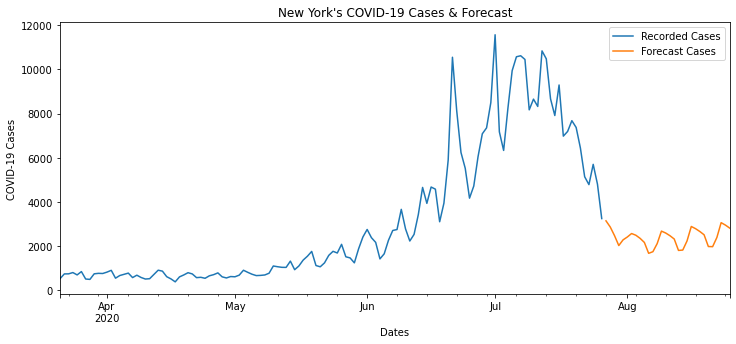

Performing stepwise search to minimize aic
Fit ARIMA(1,0,1)x(0,1,1,7) [intercept=True]; AIC=nan, BIC=nan, Time=nan seconds
Fit ARIMA(0,0,0)x(0,1,0,7) [intercept=True]; AIC=1670.814, BIC=1676.405, Time=0.009 seconds
Fit ARIMA(1,0,0)x(1,1,0,7) [intercept=True]; AIC=1662.088, BIC=1673.271, Time=0.303 seconds
Fit ARIMA(0,0,1)x(0,1,1,7) [intercept=True]; AIC=1653.912, BIC=1665.096, Time=0.339 seconds
Fit ARIMA(0,0,0)x(0,1,0,7) [intercept=False]; AIC=1689.250, BIC=1692.046, Time=0.010 seconds
Fit ARIMA(0,0,1)x(0,1,0,7) [intercept=True]; AIC=1671.350, BIC=1679.737, Time=0.112 seconds
Fit ARIMA(0,0,1)x(1,1,1,7) [intercept=True]; AIC=1653.495, BIC=1667.474, Time=0.522 seconds
Fit ARIMA(0,0,1)x(1,1,0,7) [intercept=True]; AIC=1662.403, BIC=1673.586, Time=0.265 seconds
Fit ARIMA(0,0,1)x(2,1,1,7) [intercept=True]; AIC=1655.721, BIC=1672.496, Time=0.572 seconds
Fit ARIMA(0,0,1)x(1,1,2,7) [intercept=True]; AIC=1655.756, BIC=1672.531, Time=0.835 seconds
Fit ARIMA(0,0,1)x(0,1,2,7) [intercept=True]; AIC

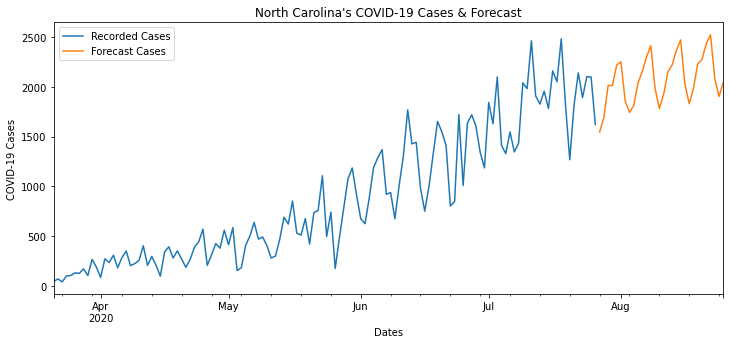

Performing stepwise search to minimize aic
Fit ARIMA(1,0,1)x(0,1,1,7) [intercept=True]; AIC=nan, BIC=nan, Time=nan seconds
Fit ARIMA(0,0,0)x(0,1,0,7) [intercept=True]; AIC=1161.680, BIC=1167.272, Time=0.009 seconds
Fit ARIMA(1,0,0)x(1,1,0,7) [intercept=True]; AIC=1118.163, BIC=1129.346, Time=0.372 seconds
Fit ARIMA(0,0,1)x(0,1,1,7) [intercept=True]; AIC=1119.128, BIC=1130.311, Time=0.226 seconds
Fit ARIMA(0,0,0)x(0,1,0,7) [intercept=False]; AIC=1166.007, BIC=1168.803, Time=0.012 seconds
Fit ARIMA(1,0,0)x(0,1,0,7) [intercept=True]; AIC=1137.900, BIC=1146.287, Time=0.046 seconds
Fit ARIMA(1,0,0)x(2,1,0,7) [intercept=True]; AIC=1112.628, BIC=1126.607, Time=0.416 seconds
Fit ARIMA(1,0,0)x(2,1,1,7) [intercept=True]; AIC=1097.257, BIC=1114.031, Time=1.042 seconds
Near non-invertible roots for order (1, 0, 0)(2, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA(1,0,0)x(1,1,1,7) [intercept=True]; AIC=1095.313, BIC=1109.292, T

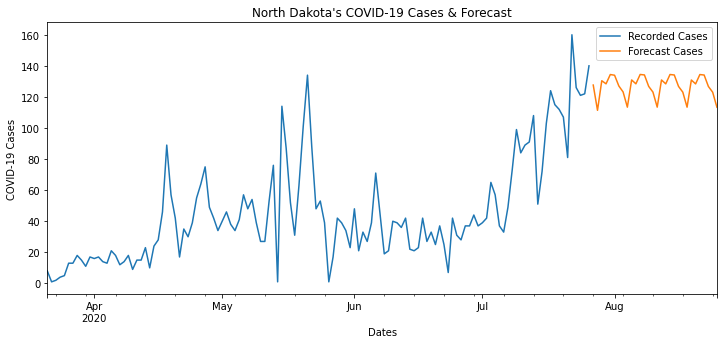

Performing stepwise search to minimize aic
Fit ARIMA(1,0,1)x(0,1,1,7) [intercept=True]; AIC=nan, BIC=nan, Time=nan seconds
Fit ARIMA(0,0,0)x(0,1,0,7) [intercept=True]; AIC=1695.587, BIC=1701.179, Time=0.010 seconds
Fit ARIMA(1,0,0)x(1,1,0,7) [intercept=True]; AIC=1591.750, BIC=1602.933, Time=0.252 seconds
Fit ARIMA(0,0,1)x(0,1,1,7) [intercept=True]; AIC=1615.252, BIC=1626.435, Time=0.282 seconds
Fit ARIMA(0,0,0)x(0,1,0,7) [intercept=False]; AIC=1701.332, BIC=1704.128, Time=0.010 seconds
Fit ARIMA(1,0,0)x(0,1,0,7) [intercept=True]; AIC=1607.615, BIC=1616.003, Time=0.052 seconds
Fit ARIMA(1,0,0)x(2,1,0,7) [intercept=True]; AIC=1584.195, BIC=1598.174, Time=0.632 seconds
Fit ARIMA(1,0,0)x(2,1,1,7) [intercept=True]; AIC=1577.394, BIC=1594.169, Time=0.894 seconds
Fit ARIMA(1,0,0)x(1,1,1,7) [intercept=True]; AIC=1575.481, BIC=1589.460, Time=0.415 seconds
Fit ARIMA(1,0,0)x(0,1,1,7) [intercept=True]; AIC=1575.864, BIC=1587.047, Time=0.292 seconds
Fit ARIMA(1,0,0)x(1,1,2,7) [intercept=True]; AIC

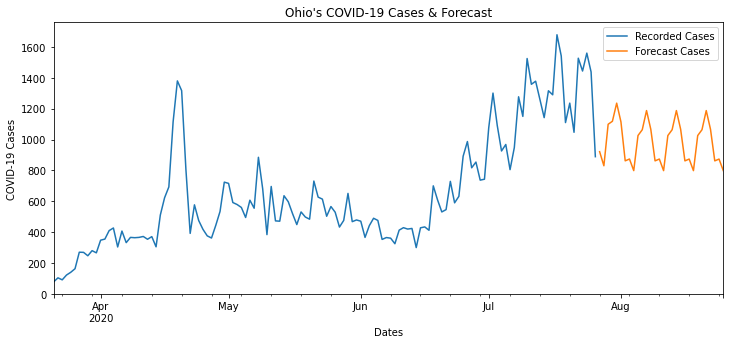

Performing stepwise search to minimize aic
Fit ARIMA(1,1,1)x(0,1,1,7) [intercept=True]; AIC=nan, BIC=nan, Time=nan seconds
Fit ARIMA(0,1,0)x(0,1,0,7) [intercept=True]; AIC=1558.782, BIC=1564.357, Time=0.010 seconds
Fit ARIMA(1,1,0)x(1,1,0,7) [intercept=True]; AIC=1520.430, BIC=1531.580, Time=0.146 seconds
Fit ARIMA(0,1,1)x(0,1,1,7) [intercept=True]; AIC=1506.422, BIC=1517.572, Time=0.277 seconds
Fit ARIMA(0,1,0)x(0,1,0,7) [intercept=False]; AIC=1557.081, BIC=1559.868, Time=0.011 seconds
Fit ARIMA(0,1,1)x(0,1,0,7) [intercept=True]; AIC=1529.365, BIC=1537.728, Time=0.122 seconds
Fit ARIMA(0,1,1)x(1,1,1,7) [intercept=True]; AIC=1508.419, BIC=1522.356, Time=0.418 seconds
Fit ARIMA(0,1,1)x(0,1,2,7) [intercept=True]; AIC=1508.418, BIC=1522.356, Time=0.496 seconds
Fit ARIMA(0,1,1)x(1,1,0,7) [intercept=True]; AIC=1512.779, BIC=1523.929, Time=0.224 seconds
Fit ARIMA(0,1,1)x(1,1,2,7) [intercept=True]; AIC=1509.687, BIC=1526.412, Time=0.976 seconds
Near non-invertible roots for order (0, 1, 1)(1,

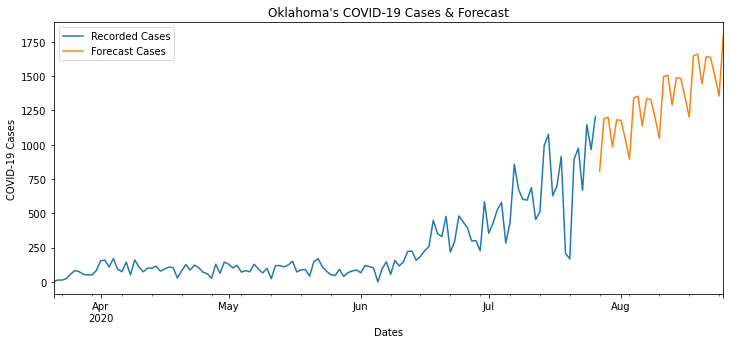

Performing stepwise search to minimize aic
Fit ARIMA(1,0,1)x(0,1,1,7) [intercept=True]; AIC=nan, BIC=nan, Time=nan seconds
Fit ARIMA(0,0,0)x(0,1,0,7) [intercept=True]; AIC=1328.683, BIC=1334.274, Time=0.010 seconds
Fit ARIMA(1,0,0)x(1,1,0,7) [intercept=True]; AIC=1315.453, BIC=1326.636, Time=0.213 seconds
Fit ARIMA(0,0,1)x(0,1,1,7) [intercept=True]; AIC=1313.874, BIC=1325.057, Time=0.198 seconds
Fit ARIMA(0,0,0)x(0,1,0,7) [intercept=False]; AIC=1335.132, BIC=1337.927, Time=0.011 seconds
Fit ARIMA(0,0,1)x(0,1,0,7) [intercept=True]; AIC=1325.491, BIC=1333.878, Time=0.098 seconds
Fit ARIMA(0,0,1)x(1,1,1,7) [intercept=True]; AIC=1315.828, BIC=1329.807, Time=0.351 seconds
Fit ARIMA(0,0,1)x(0,1,2,7) [intercept=True]; AIC=1315.833, BIC=1329.812, Time=0.484 seconds
Fit ARIMA(0,0,1)x(1,1,0,7) [intercept=True]; AIC=1315.867, BIC=1327.050, Time=0.184 seconds
Fit ARIMA(0,0,1)x(1,1,2,7) [intercept=True]; AIC=1317.828, BIC=1334.603, Time=0.534 seconds
Fit ARIMA(0,0,0)x(0,1,1,7) [intercept=True]; AIC

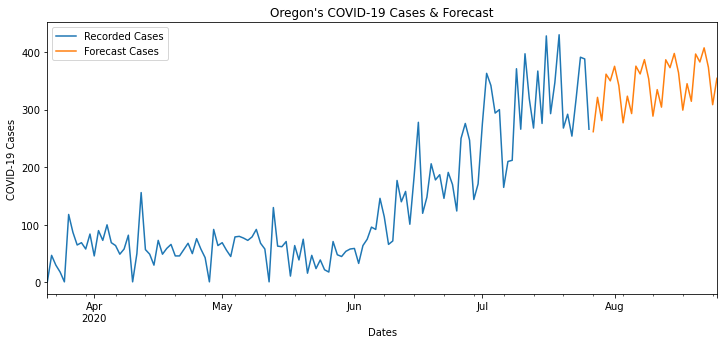

Performing stepwise search to minimize aic
Fit ARIMA(1,0,1)x(0,1,1,7) [intercept=True]; AIC=nan, BIC=nan, Time=nan seconds
Fit ARIMA(0,0,0)x(0,1,0,7) [intercept=True]; AIC=1782.444, BIC=1788.036, Time=0.009 seconds
Fit ARIMA(1,0,0)x(1,1,0,7) [intercept=True]; AIC=1760.694, BIC=1771.877, Time=0.180 seconds
Fit ARIMA(0,0,1)x(0,1,1,7) [intercept=True]; AIC=1772.954, BIC=1784.137, Time=0.189 seconds
Fit ARIMA(0,0,0)x(0,1,0,7) [intercept=False]; AIC=1781.595, BIC=1784.391, Time=0.011 seconds
Fit ARIMA(1,0,0)x(0,1,0,7) [intercept=True]; AIC=1772.960, BIC=1781.348, Time=0.030 seconds
Fit ARIMA(1,0,0)x(2,1,0,7) [intercept=True]; AIC=1747.257, BIC=1761.236, Time=0.459 seconds
Fit ARIMA(1,0,0)x(2,1,1,7) [intercept=True]; AIC=1738.759, BIC=1755.534, Time=0.931 seconds
Near non-invertible roots for order (1, 0, 0)(2, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA(1,0,0)x(1,1,1,7) [intercept=True]; AIC=1736.816, BIC=1750.795, T

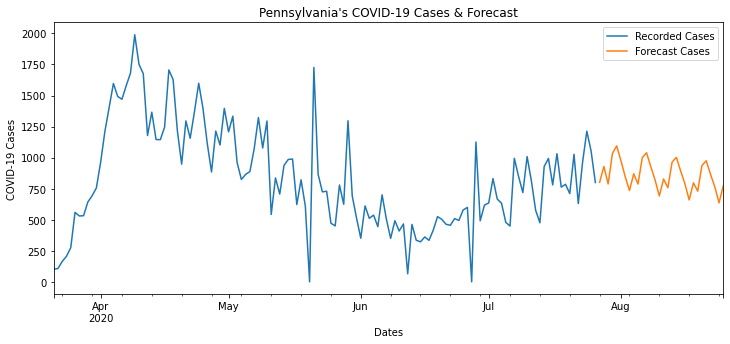

Performing stepwise search to minimize aic
Fit ARIMA(1,1,1)x(0,1,1,7) [intercept=True]; AIC=nan, BIC=nan, Time=nan seconds
Fit ARIMA(0,1,0)x(0,1,0,7) [intercept=True]; AIC=1337.339, BIC=1342.914, Time=0.011 seconds
Fit ARIMA(1,1,0)x(1,1,0,7) [intercept=True]; AIC=1294.104, BIC=1305.254, Time=0.193 seconds
Fit ARIMA(0,1,1)x(0,1,1,7) [intercept=True]; AIC=1275.667, BIC=1286.817, Time=0.162 seconds
Fit ARIMA(0,1,0)x(0,1,0,7) [intercept=False]; AIC=1335.345, BIC=1338.132, Time=0.011 seconds
Fit ARIMA(0,1,1)x(0,1,0,7) [intercept=True]; AIC=1323.584, BIC=1331.946, Time=0.087 seconds
Fit ARIMA(0,1,1)x(1,1,1,7) [intercept=True]; AIC=1277.547, BIC=1291.484, Time=0.431 seconds
Fit ARIMA(0,1,1)x(0,1,2,7) [intercept=True]; AIC=1277.596, BIC=1291.534, Time=0.593 seconds
Fit ARIMA(0,1,1)x(1,1,0,7) [intercept=True]; AIC=1282.281, BIC=1293.431, Time=0.178 seconds
Fit ARIMA(0,1,1)x(1,1,2,7) [intercept=True]; AIC=1278.403, BIC=1295.128, Time=0.738 seconds
Near non-invertible roots for order (0, 1, 1)(1,

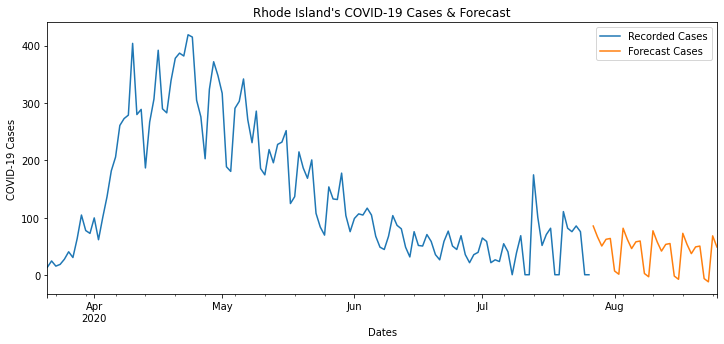

Performing stepwise search to minimize aic
Fit ARIMA(1,0,1)x(0,1,1,7) [intercept=True]; AIC=nan, BIC=nan, Time=nan seconds
Fit ARIMA(0,0,0)x(0,1,0,7) [intercept=True]; AIC=1715.968, BIC=1721.559, Time=0.010 seconds
Fit ARIMA(1,0,0)x(1,1,0,7) [intercept=True]; AIC=1689.507, BIC=1700.690, Time=0.184 seconds
Fit ARIMA(0,0,1)x(0,1,1,7) [intercept=True]; AIC=1704.227, BIC=1715.410, Time=0.175 seconds
Fit ARIMA(0,0,0)x(0,1,0,7) [intercept=False]; AIC=1725.300, BIC=1728.096, Time=0.011 seconds
Fit ARIMA(1,0,0)x(0,1,0,7) [intercept=True]; AIC=1713.222, BIC=1721.609, Time=0.054 seconds
Fit ARIMA(1,0,0)x(2,1,0,7) [intercept=True]; AIC=1691.033, BIC=1705.012, Time=0.401 seconds
Fit ARIMA(1,0,0)x(1,1,1,7) [intercept=True]; AIC=1691.042, BIC=1705.021, Time=0.304 seconds
Fit ARIMA(1,0,0)x(0,1,1,7) [intercept=True]; AIC=1686.368, BIC=1697.551, Time=0.445 seconds
Near non-invertible roots for order (1, 0, 0)(0, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the un

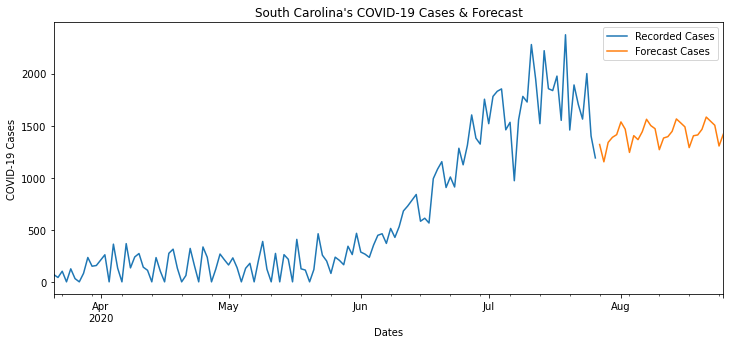

Performing stepwise search to minimize aic
Fit ARIMA(1,0,1)x(0,1,1,7) [intercept=True]; AIC=nan, BIC=nan, Time=nan seconds
Fit ARIMA(0,0,0)x(0,1,0,7) [intercept=True]; AIC=1279.225, BIC=1284.816, Time=0.010 seconds
Fit ARIMA(1,0,0)x(1,1,0,7) [intercept=True]; AIC=1185.183, BIC=1196.366, Time=0.183 seconds
Fit ARIMA(0,0,1)x(0,1,1,7) [intercept=True]; AIC=1196.177, BIC=1207.360, Time=0.252 seconds
Near non-invertible roots for order (0, 0, 1)(0, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA(0,0,0)x(0,1,0,7) [intercept=False]; AIC=1277.959, BIC=1280.755, Time=0.011 seconds
Fit ARIMA(1,0,0)x(0,1,0,7) [intercept=True]; AIC=1212.220, BIC=1220.607, Time=0.046 seconds
Fit ARIMA(1,0,0)x(2,1,0,7) [intercept=True]; AIC=1180.350, BIC=1194.329, Time=0.524 seconds
Fit ARIMA(1,0,0)x(2,1,1,7) [intercept=True]; AIC=1164.933, BIC=1181.707, Time=2.041 seconds
Near non-invertible roots for order (1, 0, 0)(2, 1, 1, 7); setting score t

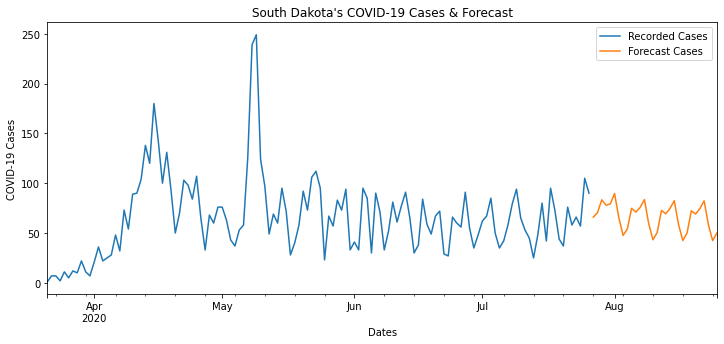

Performing stepwise search to minimize aic
Fit ARIMA(1,1,1)x(0,1,1,7) [intercept=True]; AIC=nan, BIC=nan, Time=nan seconds
Fit ARIMA(0,1,0)x(0,1,0,7) [intercept=True]; AIC=1917.017, BIC=1922.592, Time=0.010 seconds
Fit ARIMA(1,1,0)x(1,1,0,7) [intercept=True]; AIC=1801.287, BIC=1812.437, Time=0.315 seconds
Fit ARIMA(0,1,1)x(0,1,1,7) [intercept=True]; AIC=1768.192, BIC=1779.342, Time=0.301 seconds
Near non-invertible roots for order (0, 1, 1)(0, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.999)
Fit ARIMA(0,1,0)x(0,1,0,7) [intercept=False]; AIC=1915.048, BIC=1917.835, Time=0.011 seconds
Fit ARIMA(1,1,0)x(0,1,0,7) [intercept=True]; AIC=1882.789, BIC=1891.152, Time=0.025 seconds
Fit ARIMA(1,1,0)x(2,1,0,7) [intercept=True]; AIC=1800.328, BIC=1814.266, Time=0.473 seconds
Fit ARIMA(1,1,0)x(2,1,1,7) [intercept=True]; AIC=1791.526, BIC=1808.251, Time=1.359 seconds
Near non-invertible roots for order (1, 1, 0)(2, 1, 1, 7); setting score t

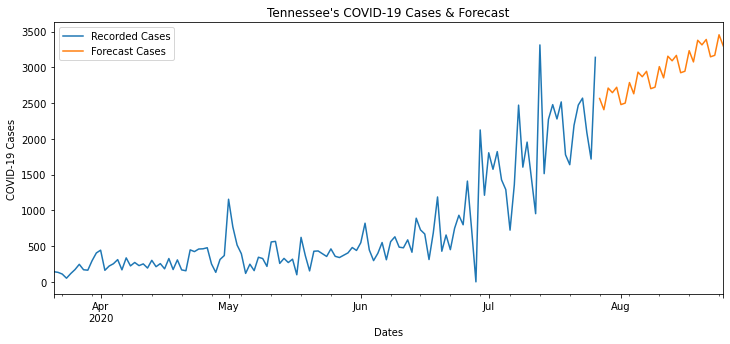

Performing stepwise search to minimize aic
Fit ARIMA(1,0,1)x(0,1,1,7) [intercept=True]; AIC=nan, BIC=nan, Time=nan seconds
Fit ARIMA(0,0,0)x(0,1,0,7) [intercept=True]; AIC=2088.245, BIC=2093.836, Time=0.010 seconds
Fit ARIMA(1,0,0)x(1,1,0,7) [intercept=True]; AIC=2046.116, BIC=2057.299, Time=0.264 seconds
Fit ARIMA(0,0,1)x(0,1,1,7) [intercept=True]; AIC=2060.414, BIC=2071.597, Time=0.328 seconds
Fit ARIMA(0,0,0)x(0,1,0,7) [intercept=False]; AIC=2099.635, BIC=2102.431, Time=0.010 seconds
Fit ARIMA(1,0,0)x(0,1,0,7) [intercept=True]; AIC=2066.721, BIC=2075.108, Time=0.020 seconds
Fit ARIMA(1,0,0)x(2,1,0,7) [intercept=True]; AIC=2044.375, BIC=2058.354, Time=0.455 seconds
Fit ARIMA(1,0,0)x(2,1,1,7) [intercept=True]; AIC=2046.135, BIC=2062.909, Time=0.591 seconds
Fit ARIMA(1,0,0)x(1,1,1,7) [intercept=True]; AIC=2044.637, BIC=2058.616, Time=0.296 seconds
Fit ARIMA(0,0,0)x(2,1,0,7) [intercept=True]; AIC=2091.967, BIC=2103.150, Time=0.119 seconds
Fit ARIMA(2,0,0)x(2,1,0,7) [intercept=True]; AIC

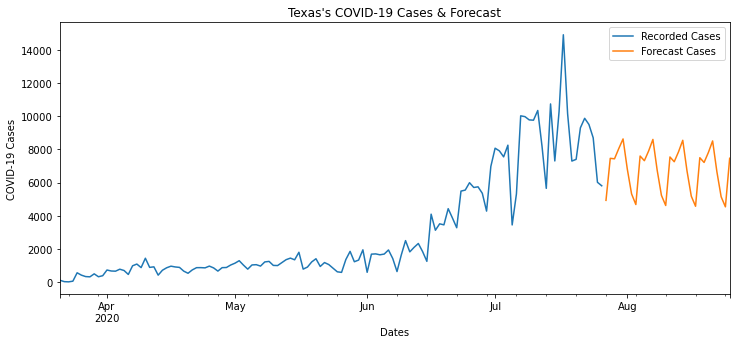

Performing stepwise search to minimize aic
Fit ARIMA(1,0,1)x(0,1,1,7) [intercept=True]; AIC=nan, BIC=nan, Time=nan seconds
Fit ARIMA(0,0,0)x(0,1,0,7) [intercept=True]; AIC=1485.756, BIC=1491.348, Time=0.010 seconds
Fit ARIMA(1,0,0)x(1,1,0,7) [intercept=True]; AIC=1447.789, BIC=1458.972, Time=0.304 seconds
Fit ARIMA(0,0,1)x(0,1,1,7) [intercept=True]; AIC=1455.824, BIC=1467.007, Time=0.221 seconds
Fit ARIMA(0,0,0)x(0,1,0,7) [intercept=False]; AIC=1491.738, BIC=1494.534, Time=0.011 seconds
Fit ARIMA(1,0,0)x(0,1,0,7) [intercept=True]; AIC=1487.751, BIC=1496.138, Time=0.054 seconds
Fit ARIMA(1,0,0)x(2,1,0,7) [intercept=True]; AIC=1442.966, BIC=1456.945, Time=0.640 seconds
Fit ARIMA(1,0,0)x(2,1,1,7) [intercept=True]; AIC=1444.923, BIC=1461.698, Time=1.113 seconds
Fit ARIMA(1,0,0)x(1,1,1,7) [intercept=True]; AIC=1443.184, BIC=1457.162, Time=0.516 seconds
Fit ARIMA(0,0,0)x(2,1,0,7) [intercept=True]; AIC=1457.673, BIC=1468.856, Time=0.360 seconds
Fit ARIMA(2,0,0)x(2,1,0,7) [intercept=True]; AIC

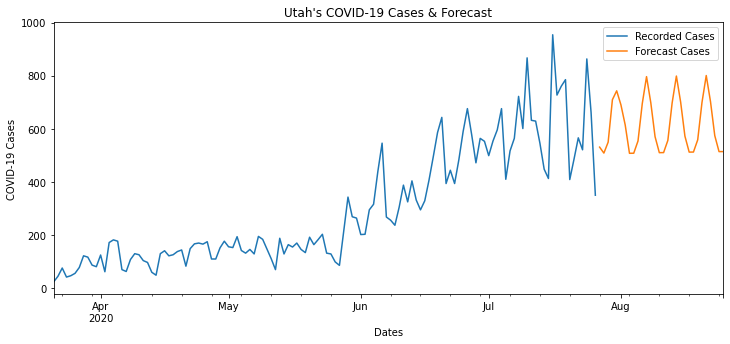

Performing stepwise search to minimize aic
Fit ARIMA(1,0,1)x(0,1,1,7) [intercept=True]; AIC=nan, BIC=nan, Time=nan seconds
Fit ARIMA(0,0,0)x(0,1,0,7) [intercept=True]; AIC=932.850, BIC=938.442, Time=0.009 seconds
Fit ARIMA(1,0,0)x(1,1,0,7) [intercept=True]; AIC=903.825, BIC=915.008, Time=0.129 seconds
Fit ARIMA(0,0,1)x(0,1,1,7) [intercept=True]; AIC=904.065, BIC=915.248, Time=0.145 seconds
Fit ARIMA(0,0,0)x(0,1,0,7) [intercept=False]; AIC=931.758, BIC=934.554, Time=0.014 seconds
Fit ARIMA(1,0,0)x(0,1,0,7) [intercept=True]; AIC=920.499, BIC=928.887, Time=0.048 seconds
Fit ARIMA(1,0,0)x(2,1,0,7) [intercept=True]; AIC=889.714, BIC=903.693, Time=0.496 seconds
Fit ARIMA(1,0,0)x(2,1,1,7) [intercept=True]; AIC=883.025, BIC=899.799, Time=0.973 seconds
Near non-invertible roots for order (1, 0, 0)(2, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA(1,0,0)x(1,1,1,7) [intercept=True]; AIC=881.208, BIC=895.187, Time=0.464 second

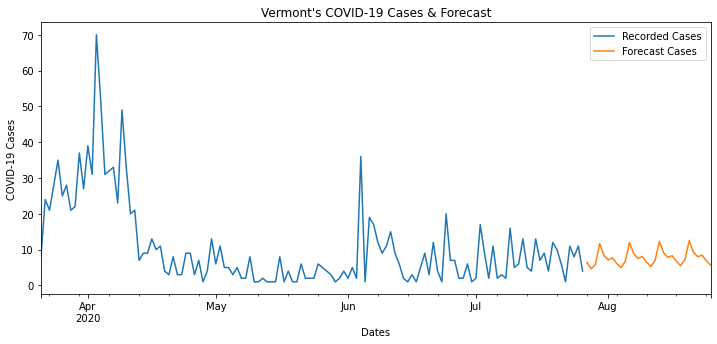

Performing stepwise search to minimize aic
Fit ARIMA(1,0,1)x(0,1,1,7) [intercept=True]; AIC=nan, BIC=nan, Time=nan seconds
Fit ARIMA(0,0,0)x(0,1,0,7) [intercept=True]; AIC=1689.964, BIC=1695.555, Time=0.009 seconds
Fit ARIMA(1,0,0)x(1,1,0,7) [intercept=True]; AIC=1676.540, BIC=1687.723, Time=0.428 seconds
Fit ARIMA(0,0,1)x(0,1,1,7) [intercept=True]; AIC=1678.305, BIC=1689.488, Time=0.243 seconds
Fit ARIMA(0,0,0)x(0,1,0,7) [intercept=False]; AIC=1693.382, BIC=1696.178, Time=0.009 seconds
Fit ARIMA(1,0,0)x(0,1,0,7) [intercept=True]; AIC=1685.640, BIC=1694.027, Time=0.055 seconds
Fit ARIMA(1,0,0)x(2,1,0,7) [intercept=True]; AIC=1675.215, BIC=1689.194, Time=0.392 seconds
Fit ARIMA(1,0,0)x(2,1,1,7) [intercept=True]; AIC=1666.478, BIC=1683.253, Time=0.939 seconds
Near non-invertible roots for order (1, 0, 0)(2, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA(1,0,0)x(1,1,1,7) [intercept=True]; AIC=1665.523, BIC=1679.502, T

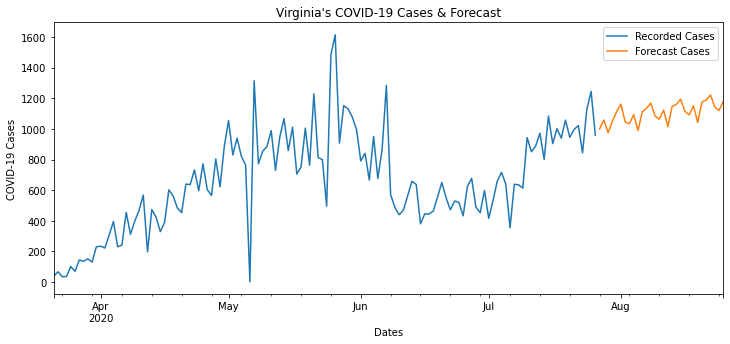

Performing stepwise search to minimize aic
Fit ARIMA(1,1,1)x(0,1,1,7) [intercept=True]; AIC=nan, BIC=nan, Time=nan seconds
Fit ARIMA(0,1,0)x(0,1,0,7) [intercept=True]; AIC=1690.550, BIC=1696.125, Time=0.011 seconds
Fit ARIMA(1,1,0)x(1,1,0,7) [intercept=True]; AIC=1638.623, BIC=1649.773, Time=0.242 seconds
Fit ARIMA(0,1,1)x(0,1,1,7) [intercept=True]; AIC=1558.593, BIC=1569.743, Time=0.442 seconds
Near non-invertible roots for order (0, 1, 1)(0, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.991)
Fit ARIMA(0,1,0)x(0,1,0,7) [intercept=False]; AIC=1688.550, BIC=1691.337, Time=0.010 seconds
Fit ARIMA(1,1,0)x(0,1,0,7) [intercept=True]; AIC=1650.204, BIC=1658.567, Time=0.027 seconds
Fit ARIMA(1,1,0)x(2,1,0,7) [intercept=True]; AIC=1585.929, BIC=1599.866, Time=0.577 seconds
Fit ARIMA(1,1,0)x(2,1,1,7) [intercept=True]; AIC=1581.744, BIC=1598.469, Time=1.019 seconds
Fit ARIMA(1,1,0)x(1,1,1,7) [intercept=True]; AIC=1601.683, BIC=1615.621, T

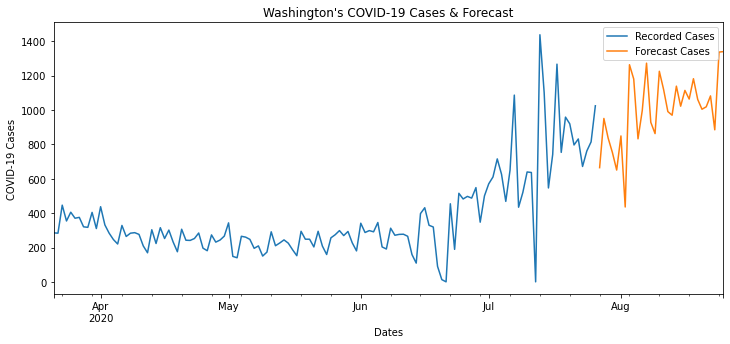

Performing stepwise search to minimize aic
Fit ARIMA(1,0,1)x(0,1,1,7) [intercept=True]; AIC=nan, BIC=nan, Time=nan seconds
Fit ARIMA(0,0,0)x(0,1,0,7) [intercept=True]; AIC=1281.212, BIC=1286.803, Time=0.009 seconds
Fit ARIMA(1,0,0)x(1,1,0,7) [intercept=True]; AIC=1272.214, BIC=1283.397, Time=0.212 seconds
Fit ARIMA(0,0,1)x(0,1,1,7) [intercept=True]; AIC=1265.819, BIC=1277.002, Time=0.205 seconds
Fit ARIMA(0,0,0)x(0,1,0,7) [intercept=False]; AIC=1281.833, BIC=1284.629, Time=0.012 seconds
Fit ARIMA(0,0,1)x(0,1,0,7) [intercept=True]; AIC=1280.730, BIC=1289.117, Time=0.099 seconds
Fit ARIMA(0,0,1)x(1,1,1,7) [intercept=True]; AIC=1266.766, BIC=1280.745, Time=0.569 seconds
Near non-invertible roots for order (0, 0, 1)(1, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA(0,0,1)x(0,1,2,7) [intercept=True]; AIC=1267.225, BIC=1281.204, Time=0.510 seconds
Fit ARIMA(0,0,1)x(1,1,0,7) [intercept=True]; AIC=1272.592, BIC=1283.775, T

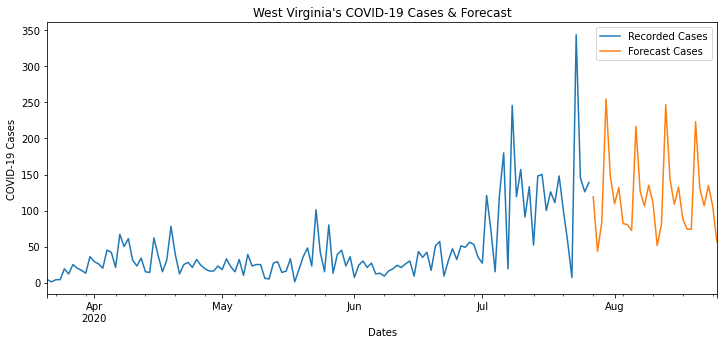

Performing stepwise search to minimize aic
Fit ARIMA(1,0,1)x(0,1,1,7) [intercept=True]; AIC=nan, BIC=nan, Time=nan seconds
Fit ARIMA(0,0,0)x(0,1,0,7) [intercept=True]; AIC=1495.819, BIC=1501.411, Time=0.010 seconds
Fit ARIMA(1,0,0)x(1,1,0,7) [intercept=True]; AIC=1466.960, BIC=1478.143, Time=0.176 seconds
Fit ARIMA(0,0,1)x(0,1,1,7) [intercept=True]; AIC=1483.114, BIC=1494.297, Time=0.273 seconds
Fit ARIMA(0,0,0)x(0,1,0,7) [intercept=False]; AIC=1514.414, BIC=1517.210, Time=0.011 seconds
Fit ARIMA(1,0,0)x(0,1,0,7) [intercept=True]; AIC=1478.188, BIC=1486.575, Time=0.100 seconds
Fit ARIMA(1,0,0)x(2,1,0,7) [intercept=True]; AIC=1468.762, BIC=1482.740, Time=0.676 seconds
Fit ARIMA(1,0,0)x(1,1,1,7) [intercept=True]; AIC=1468.282, BIC=1482.261, Time=0.408 seconds
Fit ARIMA(1,0,0)x(0,1,1,7) [intercept=True]; AIC=1468.084, BIC=1479.267, Time=0.260 seconds
Fit ARIMA(1,0,0)x(2,1,1,7) [intercept=True]; AIC=1470.064, BIC=1486.839, Time=1.038 seconds
Fit ARIMA(0,0,0)x(1,1,0,7) [intercept=True]; AIC

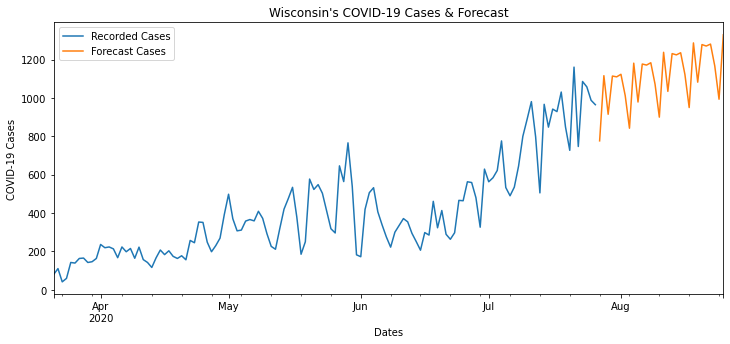

Performing stepwise search to minimize aic
Fit ARIMA(1,0,1)x(0,1,1,7) [intercept=True]; AIC=nan, BIC=nan, Time=nan seconds
Fit ARIMA(0,0,0)x(0,1,0,7) [intercept=True]; AIC=1107.180, BIC=1112.772, Time=0.010 seconds
Fit ARIMA(1,0,0)x(1,1,0,7) [intercept=True]; AIC=1085.742, BIC=1096.925, Time=0.180 seconds
Fit ARIMA(0,0,1)x(0,1,1,7) [intercept=True]; AIC=1062.286, BIC=1073.469, Time=0.235 seconds
Fit ARIMA(0,0,0)x(0,1,0,7) [intercept=False]; AIC=1106.548, BIC=1109.344, Time=0.011 seconds
Fit ARIMA(0,0,1)x(0,1,0,7) [intercept=True]; AIC=1108.112, BIC=1116.499, Time=0.082 seconds
Fit ARIMA(0,0,1)x(1,1,1,7) [intercept=True]; AIC=1063.104, BIC=1077.083, Time=0.385 seconds
Near non-invertible roots for order (0, 0, 1)(1, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.996)
Fit ARIMA(0,0,1)x(0,1,2,7) [intercept=True]; AIC=1063.198, BIC=1077.177, Time=0.410 seconds
Fit ARIMA(0,0,1)x(1,1,0,7) [intercept=True]; AIC=1085.831, BIC=1097.014, T

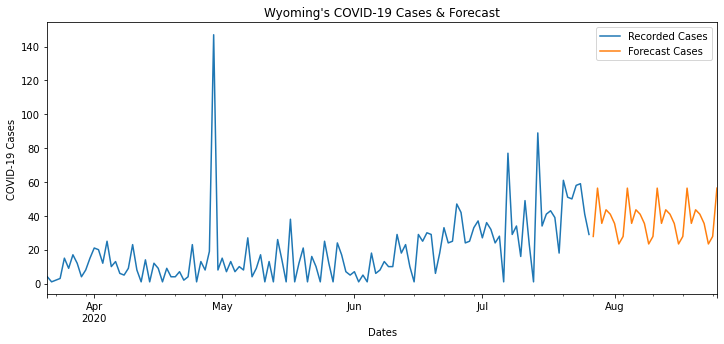

In [3]:
all_states =["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA",
          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD",
          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ",
          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC",
          "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]

for st in all_states:
    state_col = st + "_daily_pos"
    arima_func(state_col,st)